# Ações

## Indicadores consolidados - Empresas

In [1]:
import pandas as pd
import numpy as np
import json
import requests
import matplotlib.pyplot as mp
import plotly.express as px
import plotly.graph_objects as go
from bs4 import BeautifulSoup
import os
from pathlib import Path

In [2]:
tickets = ['BBAS3']
df = pd.DataFrame({'tickers': tickets})
tick_list = df['tickers'].tolist()
tick_list

['BBAS3']

## Dividend Yield - DY

In [18]:
# dicionario com todas as ações por linha a serem substituidas
index_stocks = []
index_tickers = {}
for i, v in zip((range(len(tick_list))), tick_list):
    index_tickers[i] = v
    index_stocks.append(index_tickers)
#index_tickers


url = 'https://statusinvest.com.br/acoes/busca-avancada'

dys = []

url = 'https://statusinvest.com.br/acoes/'

for i, v in zip(tick_list, (range(len(tick_list)))):
    print(f'{v}.{i}') 

    headers = {
        'authority': 'statusinvest.com.br',
        'sec-ch-ua': '\"Google Chrome\";v=\"116\", \"Chromium\";v=\"116\", \";Not A Brand\";v=\"99\"',
        'accept': '*/*',
        'x-requested-with': 'XMLHttpRequest',
        'sec-ch-ua-mobile': '?0',
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36',
        'content-type': 'application/x-www-form-urlencoded; charset=UTF-8',
        'origin': 'https://statusinvest.com.br',
        'sec-fetch-site': 'same-origin',
        'sec-fetch-mode': 'cors',
        'sec-fetch-dest': 'empty',
        'referer': url + str(i),
        'accept-language': 'pt-BR,pt;q=0.9,en-US;q=0.8,en;q=0.7',
        'cookie': '_adasys=e2299e4d-38b0-48c7-91be-a844fb91e62c; _ga=GA1.3.1768435062.1608297004; G_ENABLED_IDPS=google; __cfduid=d96cf593e372b319fd9ac85a0385fd3971614276176; denakop_freq={}; _gid=GA1.3.490929924.1615153324; __cf_bm=ccb5439cbc002734ed38f28e7c99677ec0b5afff-1615325452-1800-AWbw2mlOXKHt6BZ0dybIWT1O8Z4S9u6Mv7pm7/qkTNvQPFa+jTjP1n06mQmPXqmE938CAjZonuuP2B6noCkuoBpP5ouTIc/MWeUoxtuhdKfJ05v24zpwzU/CpAosevhANA==; _gat_gtag_UA_142136095_1=1',
    }   

    data = {
        'ticker': str(i),
        'time': '5'
    }

    response = requests.post('https://statusinvest.com.br/acao/indicatorhistorical', headers=headers, data=data)

    
    try:
        r = response.json()
    except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e}")
        exit(1)
    

    # Coletando informações para DataFrame
    dy = {}
    
    
    c = requests.get(url + str(i)).content
    soup = BeautifulSoup(c)


       ### INDICADORES DE VALUATION ###

    try:    
        dy['2023'] = r['data'][0]['ranks'][0]['value_F']
    except:
        dy['2023'] = np.NaN
    try:    
        dy['2022'] = r['data'][0]['ranks'][1]['value_F']
    except:
        dy['2022'] = np.NaN
    try:    
        dy['2021'] = r['data'][0]['ranks'][2]['value_F']
    except:
        dy['2021'] = np.NaN
    try:    
        dy['2020'] = r['data'][0]['ranks'][3]['value_F']
    except:
        dy['2020'] = np.NaN
    try:    
        dy['2019'] = r['data'][0]['ranks'][4]['value_F']
    except:
        dy['2019'] = np.NaN
    try:    
        dy['2018'] = r['data'][0]['ranks'][5]['value_F']
    except:
        dy['2018'] = np.NaN
    try:    
        dy['2017'] = r['data'][0]['ranks'][6]['value_F']
    except:
        dy['2017'] = np.NaN
    try:    
        dy['2016'] = r['data'][0]['ranks'][7]['value_F']
    except:
        dy['2016'] = np.NaN    
    try:    
        dy['2015'] = r['data'][0]['ranks'][8]['value_F']
    except:
        dy['2015'] = np.NaN
    try:    
        dy['2014'] = r['data'][0]['ranks'][9]['value_F']
    except:
        dy['2014'] = np.NaN
    try:    
        dy['2013'] = r['data'][0]['ranks'][10]['value_F']
    except:
        dy['2013'] = np.NaN
    try:    
        dy['2012'] = r['data'][0]['ranks'][11]['value_F']
    except:
        dy['2012'] = np.NaN    
    try:    
        dy['2011'] = r['data'][0]['ranks'][12]['value_F']
    except:
        dy['2011'] = np.NaN


# Adicionando resultado a lista de cards
    dys.append(dy)

# Criando um DataFrame com os resultados
dividend = pd.DataFrame(dys)
dividend.rename(index = index_tickers, inplace = True)

dividend.index.name = 'TICKERS'

dividend = dividend.replace('-%', '')
dividend = dividend.replace('-', '')

dividend['2023'] = (dividend['2023']).str.rstrip('%')
dividend['2022'] = (dividend['2022']).str.rstrip('%')
dividend['2021'] = (dividend['2021']).str.rstrip('%')
dividend['2020'] = (dividend['2020']).str.rstrip('%')
dividend['2019'] = (dividend['2019']).str.rstrip('%')
dividend['2018'] = (dividend['2018']).str.rstrip('%')
dividend['2017'] = (dividend['2017']).str.rstrip('%')
dividend['2016'] = (dividend['2016']).str.rstrip('%')
dividend['2015'] = (dividend['2015']).str.rstrip('%')
dividend['2014'] = (dividend['2014']).str.rstrip('%')
dividend['2013'] = (dividend['2013']).str.rstrip('%')
dividend['2012'] = (dividend['2012']).str.rstrip('%')
dividend['2011'] = (dividend['2011']).str.rstrip('%')

dividend.to_csv("dividend.csv")
dividend = pd.read_csv("dividend.csv", sep=',', decimal=',', thousands='.', encoding='ISO-8859-1' )
os.remove("dividend.csv")

dividend.fillna(value=0, inplace=True)
dividend.rename(columns={'TICKERS': "TICKERS_DIVIDEND" }, inplace=True)

dividend

0.BBAS3


,TICKERS_DIVIDEND,2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
0,BBAS3,9.61,12.01,7.86,3.81,4.84,3.26,2.96,2.65,11.42,6.97,9.68,6.33,7.93


## Preço / Lucro por ação - PL

In [19]:
# dicionario com todas as ações por linha a serem substituidas
index_stocks = []
index_tickers = {}
for i, v in zip((range(len(tick_list))), tick_list):
    index_tickers[i] = v
    index_stocks.append(index_tickers)
#index_tickers

url = 'https://statusinvest.com.br/acoes/busca-avancada'

pls = []

url = 'https://statusinvest.com.br/acoes/'

for i, v in zip(tick_list, (range(len(tick_list)))):
    print(f'{v}.{i}') 

    headers = {
        'authority': 'statusinvest.com.br',
        'sec-ch-ua': '\"Google Chrome\";v=\"116\", \"Chromium\";v=\"116\", \";Not A Brand\";v=\"99\"',
        'accept': '*/*',
        'x-requested-with': 'XMLHttpRequest',
        'sec-ch-ua-mobile': '?0',
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36',
        'content-type': 'application/x-www-form-urlencoded; charset=UTF-8',
        'origin': 'https://statusinvest.com.br',
        'sec-fetch-site': 'same-origin',
        'sec-fetch-mode': 'cors',
        'sec-fetch-dest': 'empty',
        'referer': url + str(i),
        'accept-language': 'pt-BR,pt;q=0.9,en-US;q=0.8,en;q=0.7',
        'cookie': '_adasys=e2299e4d-38b0-48c7-91be-a844fb91e62c; _ga=GA1.3.1768435062.1608297004; G_ENABLED_IDPS=google; __cfduid=d96cf593e372b319fd9ac85a0385fd3971614276176; denakop_freq={}; _gid=GA1.3.490929924.1615153324; __cf_bm=ccb5439cbc002734ed38f28e7c99677ec0b5afff-1615325452-1800-AWbw2mlOXKHt6BZ0dybIWT1O8Z4S9u6Mv7pm7/qkTNvQPFa+jTjP1n06mQmPXqmE938CAjZonuuP2B6noCkuoBpP5ouTIc/MWeUoxtuhdKfJ05v24zpwzU/CpAosevhANA==; _gat_gtag_UA_142136095_1=1',
    }   

    data = {
        'ticker': str(i),
        'time': '5'
    }

    response = requests.post('https://statusinvest.com.br/acao/indicatorhistorical', headers=headers, data=data)

    
    try:
        r = response.json()
    except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e}")
        exit(1)
    

    # Coletando informações para DataFrame
    pl = {}
    
    
    c = requests.get(url + str(i)).content
    soup = BeautifulSoup(c)


       ### INDICADORES DE VALUATION ###

    try:    
        pl['2023'] = r['data'][1]['ranks'][0]['value_F']
    except:
        pl['2023'] = np.NaN
    try:    
        pl['2022'] = r['data'][1]['ranks'][1]['value_F']
    except:
        pl['2022'] = np.NaN
    try:    
        pl['2021'] = r['data'][1]['ranks'][2]['value_F']
    except:
        pl['2021'] = np.NaN
    try:    
        pl['2020'] = r['data'][1]['ranks'][3]['value_F']
    except:
        pl['2020'] = np.NaN
    try:    
        pl['2019'] = r['data'][1]['ranks'][4]['value_F']
    except:
        pl['2019'] = np.NaN
    try:    
        pl['2018'] = r['data'][1]['ranks'][5]['value_F']
    except:
        pl['2018'] = np.NaN
    try:    
        pl['2017'] = r['data'][1]['ranks'][6]['value_F']
    except:
        pl['2017'] = np.NaN
    try:    
        pl['2016'] = r['data'][1]['ranks'][7]['value_F']
    except:
        pl['2016'] = np.NaN    
    try:    
        pl['2015'] = r['data'][1]['ranks'][8]['value_F']
    except:
        pl['2015'] = np.NaN
    try:    
        pl['2014'] = r['data'][1]['ranks'][9]['value_F']
    except:
        pl['2014'] = np.NaN
    try:    
        pl['2013'] = r['data'][1]['ranks'][10]['value_F']
    except:
        pl['2013'] = np.NaN
    try:    
        pl['2012'] = r['data'][1]['ranks'][11]['value_F']
    except:
        pl['2012'] = np.NaN    
    try:    
        pl['2011'] = r['data'][1]['ranks'][12]['value_F']
    except:
        pl['2011'] = np.NaN


    # Adicionando resultado a lista de cards
    pls.append(pl)

# Criando um DataFrame com os resultados
p_l = pd.DataFrame(pls)
p_l.rename(index = index_tickers, inplace = True)

p_l.index.name = 'TICKERS'

p_l = p_l.replace('-%', '')
p_l = p_l.replace('-', '')

p_l['2023'] = (p_l['2023']).str.rstrip('%')
p_l['2022'] = (p_l['2022']).str.rstrip('%')
p_l['2021'] = (p_l['2021']).str.rstrip('%')
p_l['2020'] = (p_l['2020']).str.rstrip('%')
p_l['2019'] = (p_l['2019']).str.rstrip('%')
p_l['2018'] = (p_l['2018']).str.rstrip('%')
p_l['2017'] = (p_l['2017']).str.rstrip('%')
p_l['2016'] = (p_l['2016']).str.rstrip('%')
p_l['2015'] = (p_l['2015']).str.rstrip('%')
p_l['2014'] = (p_l['2014']).str.rstrip('%')
p_l['2013'] = (p_l['2013']).str.rstrip('%')
p_l['2012'] = (p_l['2012']).str.rstrip('%')
p_l['2011'] = (p_l['2011']).str.rstrip('%')

p_l.to_csv("p_l.csv")
p_l = pd.read_csv("p_l.csv", sep=',', decimal=',', thousands='.', encoding='ISO-8859-1' )
os.remove("p_l.csv")

p_l.fillna(value=0, inplace=True)
p_l.rename(columns={'TICKERS': "TICKERS_P/L" }, inplace=True)
p_l

0.BBAS3


,TICKERS_P/L,2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
0,BBAS3,4.21,3.33,4.19,8.36,9.23,9.64,8.58,11.45,3.0,5.75,6.7,6.52,5.35


## Peg Ratio - (P/L)/[(LPA Atual / LPA Anterior)-1]

In [20]:
# dicionario com todas as ações por linha a serem substituidas
index_stocks = []
index_tickers = {}
for i, v in zip((range(len(tick_list))), tick_list):
    index_tickers[i] = v
    index_stocks.append(index_tickers)
#index_tickers

url = 'https://statusinvest.com.br/acoes/busca-avancada'

peg_ratios = []

url = 'https://statusinvest.com.br/acoes/'

for i, v in zip(tick_list, (range(len(tick_list)))):
    print(f'{v}.{i}') 

    headers = {
        'authority': 'statusinvest.com.br',
        'sec-ch-ua': '\"Google Chrome\";v=\"116\", \"Chromium\";v=\"116\", \";Not A Brand\";v=\"99\"',
        'accept': '*/*',
        'x-requested-with': 'XMLHttpRequest',
        'sec-ch-ua-mobile': '?0',
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36',
        'content-type': 'application/x-www-form-urlencoded; charset=UTF-8',
        'origin': 'https://statusinvest.com.br',
        'sec-fetch-site': 'same-origin',
        'sec-fetch-mode': 'cors',
        'sec-fetch-dest': 'empty',
        'referer': url + str(i),
        'accept-language': 'pt-BR,pt;q=0.9,en-US;q=0.8,en;q=0.7',
        'cookie': '_adasys=e2299e4d-38b0-48c7-91be-a844fb91e62c; _ga=GA1.3.1768435062.1608297004; G_ENABLED_IDPS=google; __cfduid=d96cf593e372b319fd9ac85a0385fd3971614276176; denakop_freq={}; _gid=GA1.3.490929924.1615153324; __cf_bm=ccb5439cbc002734ed38f28e7c99677ec0b5afff-1615325452-1800-AWbw2mlOXKHt6BZ0dybIWT1O8Z4S9u6Mv7pm7/qkTNvQPFa+jTjP1n06mQmPXqmE938CAjZonuuP2B6noCkuoBpP5ouTIc/MWeUoxtuhdKfJ05v24zpwzU/CpAosevhANA==; _gat_gtag_UA_142136095_1=1',
    }   

    data = {
        'ticker': str(i),
        'time': '5'
    }

    response = requests.post('https://statusinvest.com.br/acao/indicatorhistorical', headers=headers, data=data)

    
    try:
        r = response.json()
    except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e}")
        exit(1)
    

    # Coletando informações para DataFrame
    peg_ratio = {}
    
    
    c = requests.get(url + str(i)).content
    soup = BeautifulSoup(c)


       ### INDICADORES DE VALUATION ###

    try:    
        peg_ratio['2023'] = r['data'][13]['ranks'][0]['value_F']
    except:
        peg_ratio['2023'] = np.NaN
    try:    
        peg_ratio['2022'] = r['data'][13]['ranks'][1]['value_F']
    except:
        peg_ratio['2022'] = np.NaN
    try:    
        peg_ratio['2021'] = r['data'][13]['ranks'][2]['value_F']
    except:
        peg_ratio['2021'] = np.NaN
    try:    
        peg_ratio['2020'] = r['data'][13]['ranks'][3]['value_F']
    except:
        peg_ratio['2020'] = np.NaN
    try:    
        peg_ratio['2019'] = r['data'][13]['ranks'][4]['value_F']
    except:
        peg_ratio['2019'] = np.NaN
    try:    
        peg_ratio['2018'] = r['data'][13]['ranks'][5]['value_F']
    except:
        peg_ratio['2018'] = np.NaN
    try:    
        peg_ratio['2017'] = r['data'][13]['ranks'][6]['value_F']
    except:
        peg_ratio['2017'] = np.NaN
    try:    
        peg_ratio['2016'] = r['data'][13]['ranks'][7]['value_F']
    except:
        peg_ratio['2016'] = np.NaN    
    try:    
        peg_ratio['2015'] = r['data'][13]['ranks'][8]['value_F']
    except:
        peg_ratio['2015'] = np.NaN
    try:    
        peg_ratio['2014'] = r['data'][13]['ranks'][9]['value_F']
    except:
        peg_ratio['2014'] = np.NaN
    try:    
        peg_ratio['2013'] = r['data'][13]['ranks'][10]['value_F']
    except:
        peg_ratio['2013'] = np.NaN
    try:    
        peg_ratio['2012'] = r['data'][13]['ranks'][11]['value_F']
    except:
        peg_ratio['2012'] = np.NaN    
    try:    
        peg_ratio['2011'] = r['data'][13]['ranks'][12]['value_F']
    except:
        peg_ratio['2011'] = np.NaN


    # Adicionando resultado a lista de cards
    peg_ratios.append(peg_ratio)
    
# Criando um DataFrame com os resultados
pegratio = pd.DataFrame(peg_ratios)

pegratio.rename(index = index_tickers, inplace = True)

pegratio.index.name = 'TICKERS'

pegratio = pegratio.replace('-%', '')
pegratio = pegratio.replace('-', '')

pegratio['2023'] = (pegratio['2023']).str.rstrip('%')
pegratio['2022'] = (pegratio['2022']).str.rstrip('%')
pegratio['2021'] = (pegratio['2021']).str.rstrip('%')
pegratio['2020'] = (pegratio['2020']).str.rstrip('%')
pegratio['2019'] = (pegratio['2019']).str.rstrip('%')
pegratio['2018'] = (pegratio['2018']).str.rstrip('%')
pegratio['2017'] = (pegratio['2017']).str.rstrip('%')
pegratio['2016'] = (pegratio['2016']).str.rstrip('%')
pegratio['2015'] = (pegratio['2015']).str.rstrip('%')
pegratio['2014'] = (pegratio['2014']).str.rstrip('%')
pegratio['2013'] = (pegratio['2013']).str.rstrip('%')
pegratio['2012'] = (pegratio['2012']).str.rstrip('%')
pegratio['2011'] = (pegratio['2011']).str.rstrip('%')

pegratio.to_csv("pegratio.csv")
pegratio = pd.read_csv("pegratio.csv", sep=',', decimal=',', thousands='.', encoding='ISO-8859-1' )
os.remove("pegratio.csv")

pegratio.fillna(value=0, inplace=True)
pegratio.rename(columns={'TICKERS': "TICKERS_PEGRATIO" }, inplace=True)
pegratio

0.BBAS3


,TICKERS_PEGRATIO,2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
0,BBAS3,0.1,0.06,0.0,0.0,0.0,0.32,0.17,-0.23,0.16,0.42,-0.93,-0.58,0.0


## Preço atual / Valor Patrimonial por ação (VPA)

In [21]:
# dicionario com todas as ações por linha a serem substituidas
index_stocks = []
index_tickers = {}
for i, v in zip((range(len(tick_list))), tick_list):
    index_tickers[i] = v
    index_stocks.append(index_tickers)
#index_tickers

url = 'https://statusinvest.com.br/acoes/busca-avancada'

pvps = []

url = 'https://statusinvest.com.br/acoes/'

for i, v in zip(tick_list, (range(len(tick_list)))):
    print(f'{v}.{i}') 

    headers = {
        'authority': 'statusinvest.com.br',
        'sec-ch-ua': '\"Google Chrome\";v=\"116\", \"Chromium\";v=\"116\", \";Not A Brand\";v=\"99\"',
        'accept': '*/*',
        'x-requested-with': 'XMLHttpRequest',
        'sec-ch-ua-mobile': '?0',
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36',
        'content-type': 'application/x-www-form-urlencoded; charset=UTF-8',
        'origin': 'https://statusinvest.com.br',
        'sec-fetch-site': 'same-origin',
        'sec-fetch-mode': 'cors',
        'sec-fetch-dest': 'empty',
        'referer': url + str(i),
        'accept-language': 'pt-BR,pt;q=0.9,en-US;q=0.8,en;q=0.7',
        'cookie': '_adasys=e2299e4d-38b0-48c7-91be-a844fb91e62c; _ga=GA1.3.1768435062.1608297004; G_ENABLED_IDPS=google; __cfduid=d96cf593e372b319fd9ac85a0385fd3971614276176; denakop_freq={}; _gid=GA1.3.490929924.1615153324; __cf_bm=ccb5439cbc002734ed38f28e7c99677ec0b5afff-1615325452-1800-AWbw2mlOXKHt6BZ0dybIWT1O8Z4S9u6Mv7pm7/qkTNvQPFa+jTjP1n06mQmPXqmE938CAjZonuuP2B6noCkuoBpP5ouTIc/MWeUoxtuhdKfJ05v24zpwzU/CpAosevhANA==; _gat_gtag_UA_142136095_1=1',
    }   

    data = {
        'ticker': str(i),
        'time': '5'
    }

    response = requests.post('https://statusinvest.com.br/acao/indicatorhistorical', headers=headers, data=data)

    
    try:
        r = response.json()
    except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e}")
        exit(1)
    

    # Coletando informações para DataFrame
    pvp = {}
    
    
    c = requests.get(url + str(i)).content
    soup = BeautifulSoup(c)


       ### INDICADORES DE VALUATION ###

    try:    
        pvp['2023'] = r['data'][2]['ranks'][0]['value_F']
    except:
        pvp['2023'] = np.NaN
    try:    
        pvp['2022'] = r['data'][2]['ranks'][1]['value_F']
    except:
        pvp['2022'] = np.NaN
    try:    
        pvp['2021'] = r['data'][2]['ranks'][2]['value_F']
    except:
        pvp['2021'] = np.NaN
    try:    
        pvp['2020'] = r['data'][2]['ranks'][3]['value_F']
    except:
        pvp['2020'] = np.NaN
    try:    
        pvp['2019'] = r['data'][2]['ranks'][4]['value_F']
    except:
        pvp['2019'] = np.NaN
    try:    
        pvp['2018'] = r['data'][2]['ranks'][5]['value_F']
    except:
        pvp['2018'] = np.NaN
    try:    
        pvp['2017'] = r['data'][2]['ranks'][6]['value_F']
    except:
        pvp['2017'] = np.NaN
    try:    
        pvp['2016'] = r['data'][2]['ranks'][7]['value_F']
    except:
        pvp['2016'] = np.NaN    
    try:    
        pvp['2015'] = r['data'][2]['ranks'][8]['value_F']
    except:
        pvp['2015'] = np.NaN
    try:    
        pvp['2014'] = r['data'][2]['ranks'][9]['value_F']
    except:
        pvp['2014'] = np.NaN
    try:    
        pvp['2013'] = r['data'][2]['ranks'][10]['value_F']
    except:
        pvp['2013'] = np.NaN
    try:    
        pvp['2012'] = r['data'][2]['ranks'][11]['value_F']
    except:
        pvp['2012'] = np.NaN    
    try:    
        pvp['2011'] = r['data'][2]['ranks'][12]['value_F']
    except:
        pvp['2011'] = np.NaN

    # Adicionando resultado a lista de cards
    pvps.append(pvp)

# Criando um DataFrame com os resultados
p_vp = pd.DataFrame(pvps)
p_vp.rename(index = index_tickers, inplace = True)

p_vp.index.name = 'TICKERS'

p_vp = p_vp.replace('-%', '')
p_vp = p_vp.replace('-', '')

p_vp['2023'] = (p_vp['2023']).str.rstrip('%')
p_vp['2022'] = (p_vp['2022']).str.rstrip('%')
p_vp['2021'] = (p_vp['2021']).str.rstrip('%')
p_vp['2020'] = (p_vp['2020']).str.rstrip('%')
p_vp['2019'] = (p_vp['2019']).str.rstrip('%')
p_vp['2018'] = (p_vp['2018']).str.rstrip('%')
p_vp['2017'] = (p_vp['2017']).str.rstrip('%')
p_vp['2016'] = (p_vp['2016']).str.rstrip('%')
p_vp['2015'] = (p_vp['2015']).str.rstrip('%')
p_vp['2014'] = (p_vp['2014']).str.rstrip('%')
p_vp['2013'] = (p_vp['2013']).str.rstrip('%')
p_vp['2012'] = (p_vp['2012']).str.rstrip('%')
p_vp['2011'] = (p_vp['2011']).str.rstrip('%')

p_vp.to_csv("p_vp.csv")
p_vp = pd.read_csv("p_vp.csv", sep=',', decimal=',', thousands='.', encoding='ISO-8859-1' )
os.remove("p_vp.csv")

p_vp.fillna(value=0, inplace=True)
p_vp.rename(columns={'TICKERS': "TICKERS_P/VP" }, inplace=True)
p_vp

0.BBAS3


,TICKERS_P/VP,2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
0,BBAS3,0.84,0.62,0.58,0.95,1.53,1.45,1.04,1.06,0.6,0.98,1.0,1.2,1.17


## Valor Firma(EV) / EBITDA [EV/EBITDA]

In [22]:
# dicionario com todas as ações por linha a serem substituidas
index_stocks = []
index_tickers = {}
for i, v in zip((range(len(tick_list))), tick_list):
    index_tickers[i] = v
    index_stocks.append(index_tickers)
#index_tickers

url = 'https://statusinvest.com.br/acoes/busca-avancada'

evebitdas = []

url = 'https://statusinvest.com.br/acoes/'

for i, v in zip(tick_list, (range(len(tick_list)))):
    print(f'{v}.{i}') 

    headers = {
        'authority': 'statusinvest.com.br',
        'sec-ch-ua': '\"Google Chrome\";v=\"116\", \"Chromium\";v=\"116\", \";Not A Brand\";v=\"99\"',
        'accept': '*/*',
        'x-requested-with': 'XMLHttpRequest',
        'sec-ch-ua-mobile': '?0',
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36',
        'content-type': 'application/x-www-form-urlencoded; charset=UTF-8',
        'origin': 'https://statusinvest.com.br',
        'sec-fetch-site': 'same-origin',
        'sec-fetch-mode': 'cors',
        'sec-fetch-dest': 'empty',
        'referer': url + str(i),
        'accept-language': 'pt-BR,pt;q=0.9,en-US;q=0.8,en;q=0.7',
        'cookie': '_adasys=e2299e4d-38b0-48c7-91be-a844fb91e62c; _ga=GA1.3.1768435062.1608297004; G_ENABLED_IDPS=google; __cfduid=d96cf593e372b319fd9ac85a0385fd3971614276176; denakop_freq={}; _gid=GA1.3.490929924.1615153324; __cf_bm=ccb5439cbc002734ed38f28e7c99677ec0b5afff-1615325452-1800-AWbw2mlOXKHt6BZ0dybIWT1O8Z4S9u6Mv7pm7/qkTNvQPFa+jTjP1n06mQmPXqmE938CAjZonuuP2B6noCkuoBpP5ouTIc/MWeUoxtuhdKfJ05v24zpwzU/CpAosevhANA==; _gat_gtag_UA_142136095_1=1',
    }   

    data = {
        'ticker': str(i),
        'time': '5'
    }

    response = requests.post('https://statusinvest.com.br/acao/indicatorhistorical', headers=headers, data=data)

    
    try:
        r = response.json()
    except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e}")
        exit(1)
    

    # Coletando informações para DataFrame
    evebitda = {}
    
    
    c = requests.get(url + str(i)).content
    soup = BeautifulSoup(c)


       ### INDICADORES DE VALUATION ###

    try:    
        evebitda['2023'] = r['data'][3]['ranks'][0]['value_F']
    except:
        evebitda['2023'] = np.NaN
    try:    
        evebitda['2022'] = r['data'][3]['ranks'][1]['value_F']
    except:
        evebitda['2022'] = np.NaN
    try:    
        evebitda['2021'] = r['data'][3]['ranks'][2]['value_F']
    except:
        evebitda['2021'] = np.NaN
    try:    
        evebitda['2020'] = r['data'][3]['ranks'][3]['value_F']
    except:
        evebitda['2020'] = np.NaN
    try:    
        evebitda['2019'] = r['data'][3]['ranks'][4]['value_F']
    except:
        evebitda['2019'] = np.NaN
    try:    
        evebitda['2018'] = r['data'][3]['ranks'][5]['value_F']
    except:
        evebitda['2018'] = np.NaN
    try:    
        evebitda['2017'] = r['data'][3]['ranks'][6]['value_F']
    except:
        evebitda['2017'] = np.NaN
    try:    
        evebitda['2016'] = r['data'][3]['ranks'][7]['value_F']
    except:
        evebitda['2016'] = np.NaN    
    try:    
        evebitda['2015'] = r['data'][3]['ranks'][8]['value_F']
    except:
        evebitda['2015'] = np.NaN
    try:    
        evebitda['2014'] = r['data'][3]['ranks'][9]['value_F']
    except:
        evebitda['2014'] = np.NaN
    try:    
        evebitda['2013'] = r['data'][3]['ranks'][10]['value_F']
    except:
        evebitda['2013'] = np.NaN
    try:    
        evebitda['2012'] = r['data'][3]['ranks'][11]['value_F']
    except:
        evebitda['2012'] = np.NaN    
    try:    
        evebitda['2011'] = r['data'][3]['ranks'][12]['value_F']
    except:
        evebitda['2011'] = np.NaN

    # Adicionando resultado a lista de cards
    evebitdas.append(evebitda)

# Criando um DataFrame com os resultados
ev_ebitda = pd.DataFrame(evebitdas)
ev_ebitda.rename(index = index_tickers, inplace = True)

ev_ebitda.rename(index = index_tickers, inplace = True)

ev_ebitda.index.name = 'TICKERS'

ev_ebitda = ev_ebitda.replace('-%', '')
ev_ebitda = ev_ebitda.replace('-', '')

ev_ebitda['2023'] = (ev_ebitda['2023']).str.rstrip('%')
ev_ebitda['2022'] = (ev_ebitda['2022']).str.rstrip('%')
ev_ebitda['2021'] = (ev_ebitda['2021']).str.rstrip('%')
ev_ebitda['2020'] = (ev_ebitda['2020']).str.rstrip('%')
ev_ebitda['2019'] = (ev_ebitda['2019']).str.rstrip('%')
ev_ebitda['2018'] = (ev_ebitda['2018']).str.rstrip('%')
ev_ebitda['2017'] = (ev_ebitda['2017']).str.rstrip('%')
ev_ebitda['2016'] = (ev_ebitda['2016']).str.rstrip('%')
ev_ebitda['2015'] = (ev_ebitda['2015']).str.rstrip('%')
ev_ebitda['2014'] = (ev_ebitda['2014']).str.rstrip('%')
ev_ebitda['2013'] = (ev_ebitda['2013']).str.rstrip('%')
ev_ebitda['2012'] = (ev_ebitda['2012']).str.rstrip('%')
ev_ebitda['2011'] = (ev_ebitda['2011']).str.rstrip('%')

ev_ebitda.to_csv("ev_ebitda.csv")
ev_ebitda = pd.read_csv("ev_ebitda.csv", sep=',', decimal=',', thousands='.', encoding='ISO-8859-1' )
os.remove("ev_ebitda.csv")

ev_ebitda.fillna(value=0, inplace=True)
ev_ebitda.rename(columns={'TICKERS': "TICKERS_EV/EBITDA" }, inplace=True)
ev_ebitda

0.BBAS3


,TICKERS_EV/EBITDA,2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
0,BBAS3,0.0,0.0,0.0,0.0,10.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Valor Firma(EV) / EBIT [EV/EBIT]

In [32]:
# dicionario com todas as ações por linha a serem substituidas
index_stocks = []
index_tickers = {}
for i, v in zip((range(len(tick_list))), tick_list):
    index_tickers[i] = v
    index_stocks.append(index_tickers)
#index_tickers

url = 'https://statusinvest.com.br/acoes/busca-avancada'

evebits = []

url = 'https://statusinvest.com.br/acoes/'

for i, v in zip(tick_list, (range(len(tick_list)))):
    print(f'{v}.{i}') 

    headers = {
        'authority': 'statusinvest.com.br',
        'sec-ch-ua': '\"Google Chrome\";v=\"116\", \"Chromium\";v=\"116\", \";Not A Brand\";v=\"99\"',
        'accept': '*/*',
        'x-requested-with': 'XMLHttpRequest',
        'sec-ch-ua-mobile': '?0',
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36',
        'content-type': 'application/x-www-form-urlencoded; charset=UTF-8',
        'origin': 'https://statusinvest.com.br',
        'sec-fetch-site': 'same-origin',
        'sec-fetch-mode': 'cors',
        'sec-fetch-dest': 'empty',
        'referer': url + str(i),
        'accept-language': 'pt-BR,pt;q=0.9,en-US;q=0.8,en;q=0.7',
        'cookie': '_adasys=e2299e4d-38b0-48c7-91be-a844fb91e62c; _ga=GA1.3.1768435062.1608297004; G_ENABLED_IDPS=google; __cfduid=d96cf593e372b319fd9ac85a0385fd3971614276176; denakop_freq={}; _gid=GA1.3.490929924.1615153324; __cf_bm=ccb5439cbc002734ed38f28e7c99677ec0b5afff-1615325452-1800-AWbw2mlOXKHt6BZ0dybIWT1O8Z4S9u6Mv7pm7/qkTNvQPFa+jTjP1n06mQmPXqmE938CAjZonuuP2B6noCkuoBpP5ouTIc/MWeUoxtuhdKfJ05v24zpwzU/CpAosevhANA==; _gat_gtag_UA_142136095_1=1',
    }   

    data = {
        'ticker': str(i),
        'time': '5'
    }

    response = requests.post('https://statusinvest.com.br/acao/indicatorhistorical', headers=headers, data=data)

    
    try:
        r = response.json()
    except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e}")
        exit(1)
    

    # Coletando informações para DataFrame
    evebit = {}
    
    
    c = requests.get(url + str(i)).content
    soup = BeautifulSoup(c)


       ### INDICADORES DE VALUATION ###

    try:    
        evebit['2023'] = r['data'][10]['ranks'][0]['value_F']
    except:
        evebit['2023'] = np.NaN
    try:    
        evebit['2022'] = r['data'][10]['ranks'][1]['value_F']
    except:
        evebit['2022'] = np.NaN
    try:    
        evebit['2021'] = r['data'][10]['ranks'][2]['value_F']
    except:
        evebit['2021'] = np.NaN
    try:    
        evebit['2020'] = r['data'][10]['ranks'][3]['value_F']
    except:
        evebit['2020'] = np.NaN
    try:    
        evebit['2019'] = r['data'][10]['ranks'][4]['value_F']
    except:
        evebit['2019'] = np.NaN
    try:    
        evebit['2018'] = r['data'][10]['ranks'][5]['value_F']
    except:
        evebit['2018'] = np.NaN
    try:    
        evebit['2017'] = r['data'][10]['ranks'][6]['value_F']
    except:
        evebit['2017'] = np.NaN
    try:    
        evebit['2016'] = r['data'][10]['ranks'][7]['value_F']
    except:
        evebit['2016'] = np.NaN    
    try:    
        evebit['2015'] = r['data'][10]['ranks'][8]['value_F']
    except:
        evebit['2015'] = np.NaN
    try:    
        evebit['2014'] = r['data'][10]['ranks'][9]['value_F']
    except:
        evebit['2014'] = np.NaN
    try:    
        evebit['2013'] = r['data'][10]['ranks'][10]['value_F']
    except:
        evebit['2013'] = np.NaN
    try:    
        evebit['2012'] = r['data'][10]['ranks'][11]['value_F']
    except:
        evebit['2012'] = np.NaN    
    try:    
        evebit['2011'] = r['data'][10]['ranks'][12]['value_F']
    except:
        evebit['2011'] = np.NaN

    # Adicionando resultado a lista de cards
    evebits.append(evebit)

# Criando um DataFrame com os resultados
ev_ebit = pd.DataFrame(evebits)
ev_ebit.rename(index = index_tickers, inplace = True)


ev_ebit.index.name = 'TICKERS'

ev_ebit = ev_ebit.replace('-%', '')
ev_ebit = ev_ebit.replace('-', '')

ev_ebit['2023'] = (ev_ebit['2023']).str.rstrip('%')
ev_ebit['2022'] = (ev_ebit['2022']).str.rstrip('%')
ev_ebit['2021'] = (ev_ebit['2021']).str.rstrip('%')
ev_ebit['2020'] = (ev_ebit['2020']).str.rstrip('%')
ev_ebit['2019'] = (ev_ebit['2019']).str.rstrip('%')
ev_ebit['2018'] = (ev_ebit['2018']).str.rstrip('%')
ev_ebit['2017'] = (ev_ebit['2017']).str.rstrip('%')
ev_ebit['2016'] = (ev_ebit['2016']).str.rstrip('%')
ev_ebit['2015'] = (ev_ebit['2015']).str.rstrip('%')
ev_ebit['2014'] = (ev_ebit['2014']).str.rstrip('%')
ev_ebit['2013'] = (ev_ebit['2013']).str.rstrip('%')
ev_ebit['2012'] = (ev_ebit['2012']).str.rstrip('%')
ev_ebit['2011'] = (ev_ebit['2011']).str.rstrip('%')

ev_ebit.to_csv("ev_ebit.csv")
ev_ebit = pd.read_csv("ev_ebit.csv", sep=',', decimal=',', thousands='.', encoding='ISO-8859-1' )
os.remove("ev_ebit.csv")

ev_ebit.fillna(value=0, inplace=True)
ev_ebit.rename(columns={'TICKERS': "TICKERS_EV/EBIT" }, inplace=True)
ev_ebit

0.BBAS3


,TICKERS_EV/EBIT,2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
0,BBAS3,3.22,2.6,3.45,9.6,13.59,6.53,5.72,7.39,4.17,4.36,5.44,4.89,3.79


## Preço / EBITDA

In [33]:
# dicionario com todas as ações por linha a serem substituidas
index_stocks = []
index_tickers = {}
for i, v in zip((range(len(tick_list))), tick_list):
    index_tickers[i] = v
    index_stocks.append(index_tickers)
#index_tickers

url = 'https://statusinvest.com.br/acoes/busca-avancada'

pebitdas = []

url = 'https://statusinvest.com.br/acoes/'

for i, v in zip(tick_list, (range(len(tick_list)))):
    print(f'{v}.{i}') 

    headers = {
        'authority': 'statusinvest.com.br',
        'sec-ch-ua': '\"Google Chrome\";v=\"116\", \"Chromium\";v=\"116\", \";Not A Brand\";v=\"99\"',
        'accept': '*/*',
        'x-requested-with': 'XMLHttpRequest',
        'sec-ch-ua-mobile': '?0',
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36',
        'content-type': 'application/x-www-form-urlencoded; charset=UTF-8',
        'origin': 'https://statusinvest.com.br',
        'sec-fetch-site': 'same-origin',
        'sec-fetch-mode': 'cors',
        'sec-fetch-dest': 'empty',
        'referer': url + str(i),
        'accept-language': 'pt-BR,pt;q=0.9,en-US;q=0.8,en;q=0.7',
        'cookie': '_adasys=e2299e4d-38b0-48c7-91be-a844fb91e62c; _ga=GA1.3.1768435062.1608297004; G_ENABLED_IDPS=google; __cfduid=d96cf593e372b319fd9ac85a0385fd3971614276176; denakop_freq={}; _gid=GA1.3.490929924.1615153324; __cf_bm=ccb5439cbc002734ed38f28e7c99677ec0b5afff-1615325452-1800-AWbw2mlOXKHt6BZ0dybIWT1O8Z4S9u6Mv7pm7/qkTNvQPFa+jTjP1n06mQmPXqmE938CAjZonuuP2B6noCkuoBpP5ouTIc/MWeUoxtuhdKfJ05v24zpwzU/CpAosevhANA==; _gat_gtag_UA_142136095_1=1',
    }   

    data = {
        'ticker': str(i),
        'time': '5'
    }

    response = requests.post('https://statusinvest.com.br/acao/indicatorhistorical', headers=headers, data=data)

    
    try:
        r = response.json()
    except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e}")
        exit(1)
    

    # Coletando informações para DataFrame
    pebitda = {}
    
    
    c = requests.get(url + str(i)).content
    soup = BeautifulSoup(c)


       ### INDICADORES DE VALUATION ###

    try:    
        pebitda['2023'] = r['data'][9]['ranks'][0]['value_F']
    except:
        pebitda['2023'] = np.NaN
    try:    
        pebitda['2022'] = r['data'][9]['ranks'][1]['value_F']
    except:
        pebitda['2022'] = np.NaN
    try:    
        pebitda['2021'] = r['data'][9]['ranks'][2]['value_F']
    except:
        pebitda['2021'] = np.NaN
    try:    
        pebitda['2020'] = r['data'][9]['ranks'][3]['value_F']
    except:
        pebitda['2020'] = np.NaN
    try:    
        pebitda['2019'] = r['data'][9]['ranks'][4]['value_F']
    except:
        pebitda['2019'] = np.NaN
    try:    
        pebitda['2018'] = r['data'][9]['ranks'][5]['value_F']
    except:
        pebitda['2018'] = np.NaN
    try:    
        pebitda['2017'] = r['data'][9]['ranks'][6]['value_F']
    except:
        pebitda['2017'] = np.NaN
    try:    
        pebitda['2016'] = r['data'][9]['ranks'][7]['value_F']
    except:
        pebitda['2016'] = np.NaN    
    try:    
        pebitda['2015'] = r['data'][9]['ranks'][8]['value_F']
    except:
        pebitda['2015'] = np.NaN
    try:    
        pebitda['2014'] = r['data'][9]['ranks'][9]['value_F']
    except:
        pebitda['2014'] = np.NaN
    try:    
        pebitda['2013'] = r['data'][9]['ranks'][10]['value_F']
    except:
        pebitda['2013'] = np.NaN
    try:    
        pebitda['2012'] = r['data'][9]['ranks'][11]['value_F']
    except:
        pebitda['2012'] = np.NaN    
    try:    
        pebitda['2011'] = r['data'][9]['ranks'][12]['value_F']
    except:
        pebitda['2011'] = np.NaN

    # Adicionando resultado a lista de cards
    pebitdas.append(pebitda)
    
# Criando um DataFrame com os resultados
p_ebitda = pd.DataFrame(pebitdas)
p_ebitda.rename(index = index_tickers, inplace = True)

p_ebitda.index.name = 'TICKERS'

p_ebitda['2023'] = (p_ebitda['2023']).str.rstrip('-')
p_ebitda['2022'] = (p_ebitda['2022']).str.rstrip('-')
p_ebitda['2021'] = (p_ebitda['2021']).str.rstrip('-')
p_ebitda['2020'] = (p_ebitda['2020']).str.rstrip('-')
p_ebitda['2019'] = (p_ebitda['2019']).str.rstrip('-')
p_ebitda['2018'] = (p_ebitda['2018']).str.rstrip('-')
p_ebitda['2017'] = (p_ebitda['2017']).str.rstrip('-')
p_ebitda['2016'] = (p_ebitda['2016']).str.rstrip('-')
p_ebitda['2015'] = (p_ebitda['2015']).str.rstrip('-')
p_ebitda['2014'] = (p_ebitda['2014']).str.rstrip('-')
p_ebitda['2013'] = (p_ebitda['2013']).str.rstrip('-')
p_ebitda['2012'] = (p_ebitda['2012']).str.rstrip('-')
p_ebitda['2011'] = (p_ebitda['2011']).str.rstrip('-')


p_ebitda.to_csv("p_ebitda.csv")
p_ebitda = pd.read_csv("p_ebitda.csv", sep=',', decimal=',', thousands='.', encoding='ISO-8859-1' )
os.remove("p_ebitda.csv")

p_ebitda.fillna(value=0, inplace=True)
p_ebitda.rename(columns={'TICKERS': "TICKERS_P/EBITDA" }, inplace=True)

p_ebitda

0.BBAS3


,TICKERS_P/EBITDA,2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
0,BBAS3,0.0,0.0,0.0,0.0,10.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Preço / EBIT

In [42]:
# dicionario com todas as ações por linha a serem substituidas
index_stocks = []
index_tickers = {}
for i, v in zip((range(len(tick_list))), tick_list):
    index_tickers[i] = v
    index_stocks.append(index_tickers)
#index_tickers

url = 'https://statusinvest.com.br/acoes/busca-avancada'

pebits = []

url = 'https://statusinvest.com.br/acoes/'

for i, v in zip(tick_list, (range(len(tick_list)))):
    print(f'{v}.{i}') 

    headers = {
        'authority': 'statusinvest.com.br',
        'sec-ch-ua': '\"Google Chrome\";v=\"116\", \"Chromium\";v=\"116\", \";Not A Brand\";v=\"99\"',
        'accept': '*/*',
        'x-requested-with': 'XMLHttpRequest',
        'sec-ch-ua-mobile': '?0',
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36',
        'content-type': 'application/x-www-form-urlencoded; charset=UTF-8',
        'origin': 'https://statusinvest.com.br',
        'sec-fetch-site': 'same-origin',
        'sec-fetch-mode': 'cors',
        'sec-fetch-dest': 'empty',
        'referer': url + str(i),
        'accept-language': 'pt-BR,pt;q=0.9,en-US;q=0.8,en;q=0.7',
        'cookie': '_adasys=e2299e4d-38b0-48c7-91be-a844fb91e62c; _ga=GA1.3.1768435062.1608297004; G_ENABLED_IDPS=google; __cfduid=d96cf593e372b319fd9ac85a0385fd3971614276176; denakop_freq={}; _gid=GA1.3.490929924.1615153324; __cf_bm=ccb5439cbc002734ed38f28e7c99677ec0b5afff-1615325452-1800-AWbw2mlOXKHt6BZ0dybIWT1O8Z4S9u6Mv7pm7/qkTNvQPFa+jTjP1n06mQmPXqmE938CAjZonuuP2B6noCkuoBpP5ouTIc/MWeUoxtuhdKfJ05v24zpwzU/CpAosevhANA==; _gat_gtag_UA_142136095_1=1',
    }   

    data = {
        'ticker': str(i),
        'time': '5'
    }

    response = requests.post('https://statusinvest.com.br/acao/indicatorhistorical', headers=headers, data=data)

    
    try:
        r = response.json()
    except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e}")
        exit(1)
    

    # Coletando informações para DataFrame
    pebit = {}
    
    
    c = requests.get(url + str(i)).content
    soup = BeautifulSoup(c)


       ### INDICADORES DE VALUATION ###

    try:    
        pebit['2023'] = r['data'][4]['ranks'][0]['value_F']
    except:
        pebit['2023'] = np.NaN
    try:    
        pebit['2022'] = r['data'][4]['ranks'][1]['value_F']
    except:
        pebit['2022'] = np.NaN
    try:    
        pebit['2021'] = r['data'][4]['ranks'][2]['value_F']
    except:
        pebit['2021'] = np.NaN
    try:    
        pebit['2020'] = r['data'][4]['ranks'][3]['value_F']
    except:
        pebit['2020'] = np.NaN
    try:    
        pebit['2019'] = r['data'][4]['ranks'][4]['value_F']
    except:
        pebit['2019'] = np.NaN
    try:    
        pebit['2018'] = r['data'][4]['ranks'][5]['value_F']
    except:
        pebit['2018'] = np.NaN
    try:    
        pebit['2017'] = r['data'][4]['ranks'][6]['value_F']
    except:
        pebit['2017'] = np.NaN
    try:    
        pebit['2016'] = r['data'][4]['ranks'][7]['value_F']
    except:
        pebit['2016'] = np.NaN    
    try:    
        pebit['2015'] = r['data'][4]['ranks'][8]['value_F']
    except:
        pebit['2015'] = np.NaN
    try:    
        pebit['2014'] = r['data'][4]['ranks'][9]['value_F']
    except:
        pebit['2014'] = np.NaN
    try:    
        pebit['2013'] = r['data'][4]['ranks'][10]['value_F']
    except:
        pebit['2013'] = np.NaN
    try:    
        pebit['2012'] = r['data'][4]['ranks'][11]['value_F']
    except:
        pebit['2012'] = np.NaN    
    try:    
        pebit['2011'] = r['data'][4]['ranks'][12]['value_F']
    except:
        pebit['2011'] = np.NaN

    # Adicionando resultado a lista de cards
    pebits.append(pebit)

# Criando um DataFrame com os resultados
p_ebit = pd.DataFrame(pebits)
p_ebit.rename(index = index_tickers, inplace = True)

p_ebit.to_csv("p_ebit.csv")
p_ebit = pd.read_csv("p_ebit.csv", sep=',', decimal=',', thousands='.', encoding='ISO-8859-1' )
os.remove("p_ebit.csv")

p_ebit.fillna(value=0, inplace=True)
p_ebit.rename(columns={'Unnamed: 0': "TICKERS_P/EBIT" }, inplace=True)

p_ebit

0.BBAS3


,TICKERS_P/EBIT,2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
0,BBAS3,3.22,2.6,3.45,9.6,13.59,6.53,5.72,7.39,4.17,4.36,5.44,4.89,3.79


## PL / Nº AÇÕES - VPA

In [44]:
# dicionario com todas as ações por linha a serem substituidas
index_stocks = []
index_tickers = {}
for i, v in zip((range(len(tick_list))), tick_list):
    index_tickers[i] = v
    index_stocks.append(index_tickers)
#index_tickers

url = 'https://statusinvest.com.br/acoes/busca-avancada'

vpas = []

url = 'https://statusinvest.com.br/acoes/'

for i, v in zip(tick_list, (range(len(tick_list)))):
    print(f'{v}.{i}') 

    headers = {
        'authority': 'statusinvest.com.br',
        'sec-ch-ua': '\"Google Chrome\";v=\"116\", \"Chromium\";v=\"116\", \";Not A Brand\";v=\"99\"',
        'accept': '*/*',
        'x-requested-with': 'XMLHttpRequest',
        'sec-ch-ua-mobile': '?0',
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36',
        'content-type': 'application/x-www-form-urlencoded; charset=UTF-8',
        'origin': 'https://statusinvest.com.br',
        'sec-fetch-site': 'same-origin',
        'sec-fetch-mode': 'cors',
        'sec-fetch-dest': 'empty',
        'referer': url + str(i),
        'accept-language': 'pt-BR,pt;q=0.9,en-US;q=0.8,en;q=0.7',
        'cookie': '_adasys=e2299e4d-38b0-48c7-91be-a844fb91e62c; _ga=GA1.3.1768435062.1608297004; G_ENABLED_IDPS=google; __cfduid=d96cf593e372b319fd9ac85a0385fd3971614276176; denakop_freq={}; _gid=GA1.3.490929924.1615153324; __cf_bm=ccb5439cbc002734ed38f28e7c99677ec0b5afff-1615325452-1800-AWbw2mlOXKHt6BZ0dybIWT1O8Z4S9u6Mv7pm7/qkTNvQPFa+jTjP1n06mQmPXqmE938CAjZonuuP2B6noCkuoBpP5ouTIc/MWeUoxtuhdKfJ05v24zpwzU/CpAosevhANA==; _gat_gtag_UA_142136095_1=1',
    }   

    data = {
        'ticker': str(i),
        'time': '5'
    }

    response = requests.post('https://statusinvest.com.br/acao/indicatorhistorical', headers=headers, data=data)

    
    try:
        r = response.json()
    except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e}")
        exit(1)
    

    # Coletando informações para DataFrame
    vpa = {}
    
    
    c = requests.get(url + str(i)).content
    soup = BeautifulSoup(c)


       ### INDICADORES DE VALUATION ###

    try:    
        vpa['2023'] = r['data'][12]['ranks'][0]['value_F']
    except:
        vpa['2023'] = np.NaN
    try:    
        vpa['2022'] = r['data'][12]['ranks'][1]['value_F']
    except:
        vpa['2022'] = np.NaN
    try:    
        vpa['2021'] = r['data'][12]['ranks'][2]['value_F']
    except:
        vpa['2021'] = np.NaN
    try:    
        vpa['2020'] = r['data'][12]['ranks'][3]['value_F']
    except:
        vpa['2020'] = np.NaN
    try:    
        vpa['2019'] = r['data'][12]['ranks'][4]['value_F']
    except:
        vpa['2019'] = np.NaN
    try:    
        vpa['2018'] = r['data'][12]['ranks'][5]['value_F']
    except:
        vpa['2018'] = np.NaN
    try:    
        vpa['2017'] = r['data'][12]['ranks'][6]['value_F']
    except:
        vpa['2017'] = np.NaN
    try:    
        vpa['2016'] = r['data'][12]['ranks'][7]['value_F']
    except:
        vpa['2016'] = np.NaN    
    try:    
        vpa['2015'] = r['data'][12]['ranks'][8]['value_F']
    except:
        vpa['2015'] = np.NaN
    try:    
        vpa['2014'] = r['data'][12]['ranks'][9]['value_F']
    except:
        vpa['2014'] = np.NaN
    try:    
        vpa['2013'] = r['data'][12]['ranks'][10]['value_F']
    except:
        vpa['2013'] = np.NaN
    try:    
        vpa['2012'] = r['data'][12]['ranks'][11]['value_F']
    except:
        vpa['2012'] = np.NaN    
    try:    
        vpa['2011'] = r['data'][12]['ranks'][12]['value_F']
    except:
        vpa['2011'] = np.NaN

    # Adicionando resultado a lista de cards
    vpas.append(vpa)

# Criando um DataFrame com os resultados
vpatrimonial = pd.DataFrame(vpas)
vpatrimonial.rename(index = index_tickers, inplace = True)

vpatrimonial.to_csv("vpatrimonial.csv")
vpatrimonial = pd.read_csv("vpatrimonial.csv", sep=',', decimal=',', thousands='.', encoding='ISO-8859-1' )
os.remove("vpatrimonial.csv")

vpatrimonial.fillna(value=0, inplace=True)
vpatrimonial.rename(columns={'Unnamed: 0': "TICKERS_VPA" }, inplace=True)

vpatrimonial

0.BBAS3


,TICKERS_VPA,2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
0,BBAS3,56.75,55.58,49.82,40.74,34.51,32.1,30.55,26.6,24.66,24.37,24.38,21.36,20.33


## PREÇO / ATIVO - P/ATIVO

In [46]:
# dicionario com todas as ações por linha a serem substituidas
index_stocks = []
index_tickers = {}
for i, v in zip((range(len(tick_list))), tick_list):
    index_tickers[i] = v
    index_stocks.append(index_tickers)
#index_tickers

url = 'https://statusinvest.com.br/acoes/busca-avancada'

pativos = []

url = 'https://statusinvest.com.br/acoes/'

for i, v in zip(tick_list, (range(len(tick_list)))):
    print(f'{v}.{i}') 

    headers = {
        'authority': 'statusinvest.com.br',
        'sec-ch-ua': '\"Google Chrome\";v=\"116\", \"Chromium\";v=\"116\", \";Not A Brand\";v=\"99\"',
        'accept': '*/*',
        'x-requested-with': 'XMLHttpRequest',
        'sec-ch-ua-mobile': '?0',
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36',
        'content-type': 'application/x-www-form-urlencoded; charset=UTF-8',
        'origin': 'https://statusinvest.com.br',
        'sec-fetch-site': 'same-origin',
        'sec-fetch-mode': 'cors',
        'sec-fetch-dest': 'empty',
        'referer': url + str(i),
        'accept-language': 'pt-BR,pt;q=0.9,en-US;q=0.8,en;q=0.7',
        'cookie': '_adasys=e2299e4d-38b0-48c7-91be-a844fb91e62c; _ga=GA1.3.1768435062.1608297004; G_ENABLED_IDPS=google; __cfduid=d96cf593e372b319fd9ac85a0385fd3971614276176; denakop_freq={}; _gid=GA1.3.490929924.1615153324; __cf_bm=ccb5439cbc002734ed38f28e7c99677ec0b5afff-1615325452-1800-AWbw2mlOXKHt6BZ0dybIWT1O8Z4S9u6Mv7pm7/qkTNvQPFa+jTjP1n06mQmPXqmE938CAjZonuuP2B6noCkuoBpP5ouTIc/MWeUoxtuhdKfJ05v24zpwzU/CpAosevhANA==; _gat_gtag_UA_142136095_1=1',
    }   

    data = {
        'ticker': str(i),
        'time': '5'
    }

    response = requests.post('https://statusinvest.com.br/acao/indicatorhistorical', headers=headers, data=data)

    
    try:
        r = response.json()
    except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e}")
        exit(1)
    

    # Coletando informações para DataFrame
    pativo = {}
    
    
    c = requests.get(url + str(i)).content
    soup = BeautifulSoup(c)


       ### INDICADORES DE VALUATION ###

    try:    
        pativo['2023'] = r['data'][6]['ranks'][0]['value_F']
    except:
        pativo['2023'] = np.NaN
    try:    
        pativo['2022'] = r['data'][6]['ranks'][1]['value_F']
    except:
        pativo['2022'] = np.NaN
    try:    
        pativo['2021'] = r['data'][6]['ranks'][2]['value_F']
    except:
        pativo['2021'] = np.NaN
    try:    
        pativo['2020'] = r['data'][6]['ranks'][3]['value_F']
    except:
        pativo['2020'] = np.NaN
    try:    
        pativo['2019'] = r['data'][6]['ranks'][4]['value_F']
    except:
        pativo['2019'] = np.NaN
    try:    
        pativo['2018'] = r['data'][6]['ranks'][5]['value_F']
    except:
        pativo['2018'] = np.NaN
    try:    
        pativo['2017'] = r['data'][6]['ranks'][6]['value_F']
    except:
        pativo['2017'] = np.NaN
    try:    
        pativo['2016'] = r['data'][6]['ranks'][7]['value_F']
    except:
        pativo['2016'] = np.NaN    
    try:    
        pativo['2015'] = r['data'][6]['ranks'][8]['value_F']
    except:
        pativo['2015'] = np.NaN
    try:    
        pativo['2014'] = r['data'][6]['ranks'][9]['value_F']
    except:
        pativo['2014'] = np.NaN
    try:    
        pativo['2013'] = r['data'][6]['ranks'][10]['value_F']
    except:
        pativo['2013'] = np.NaN
    try:    
        pativo['2012'] = r['data'][6]['ranks'][11]['value_F']
    except:
        pativo['2012'] = np.NaN    
    try:    
        pativo['2011'] = r['data'][6]['ranks'][12]['value_F']
    except:
        pativo['2011'] = np.NaN

    # Adicionando resultado a lista de cards
    pativos.append(pativo)

# Criando um DataFrame com os resultados
p_ativo = pd.DataFrame(pativos)
p_ativo.rename(index = index_tickers, inplace = True)

p_ativo.to_csv("p_ativo.csv")
p_ativo = pd.read_csv("p_ativo.csv", sep=',', decimal=',', thousands='.', encoding='ISO-8859-1' )
os.remove("p_ativo.csv")

p_ativo.fillna(value=0, inplace=True)
p_ativo.rename(columns={'Unnamed: 0': "TICKERS_P/ATIVO" }, inplace=True)

p_ativo

0.BBAS3


,TICKERS_P/ATIVO,2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
0,BBAS3,0.07,0.05,0.04,0.06,0.1,0.09,0.06,0.05,0.03,0.05,0.06,0.07,0.08


## LUCRO LÍQUIDO / Nº AÇÕES - LPA

In [55]:
# dicionario com todas as ações por linha a serem substituidas
index_stocks = []
index_tickers = {}
for i, v in zip((range(len(tick_list))), tick_list):
    index_tickers[i] = v
    index_stocks.append(index_tickers)
#index_tickers

url = 'https://statusinvest.com.br/acoes/busca-avancada'

lpas = []

url = 'https://statusinvest.com.br/acoes/'

for i, v in zip(tick_list, (range(len(tick_list)))):
    print(f'{v}.{i}') 

    headers = {
        'authority': 'statusinvest.com.br',
        'sec-ch-ua': '\"Google Chrome\";v=\"116\", \"Chromium\";v=\"116\", \";Not A Brand\";v=\"99\"',
        'accept': '*/*',
        'x-requested-with': 'XMLHttpRequest',
        'sec-ch-ua-mobile': '?0',
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36',
        'content-type': 'application/x-www-form-urlencoded; charset=UTF-8',
        'origin': 'https://statusinvest.com.br',
        'sec-fetch-site': 'same-origin',
        'sec-fetch-mode': 'cors',
        'sec-fetch-dest': 'empty',
        'referer': url + str(i),
        'accept-language': 'pt-BR,pt;q=0.9,en-US;q=0.8,en;q=0.7',
        'cookie': '_adasys=e2299e4d-38b0-48c7-91be-a844fb91e62c; _ga=GA1.3.1768435062.1608297004; G_ENABLED_IDPS=google; __cfduid=d96cf593e372b319fd9ac85a0385fd3971614276176; denakop_freq={}; _gid=GA1.3.490929924.1615153324; __cf_bm=ccb5439cbc002734ed38f28e7c99677ec0b5afff-1615325452-1800-AWbw2mlOXKHt6BZ0dybIWT1O8Z4S9u6Mv7pm7/qkTNvQPFa+jTjP1n06mQmPXqmE938CAjZonuuP2B6noCkuoBpP5ouTIc/MWeUoxtuhdKfJ05v24zpwzU/CpAosevhANA==; _gat_gtag_UA_142136095_1=1',
    }   

    data = {
        'ticker': str(i),
        'time': '5'
    }

    response = requests.post('https://statusinvest.com.br/acao/indicatorhistorical', headers=headers, data=data)

    
    try:
        r = response.json()
    except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e}")
        exit(1)
    

    # Coletando informações para DataFrame
    lpa = {}
    
    
    c = requests.get(url + str(i)).content
    soup = BeautifulSoup(c)


       ### INDICADORES DE VALUATION ###

    try:    
        lpa['2023'] = r['data'][11]['ranks'][0]['value_F']
    except:
        lpa['2023'] = np.NaN
    try:    
        lpa['2022'] = r['data'][11]['ranks'][1]['value_F']
    except:
        lpa['2022'] = np.NaN
    try:    
        lpa['2021'] = r['data'][11]['ranks'][2]['value_F']
    except:
        lpa['2021'] = np.NaN
    try:    
        lpa['2020'] = r['data'][11]['ranks'][3]['value_F']
    except:
        lpa['2020'] = np.NaN
    try:    
        lpa['2019'] = r['data'][11]['ranks'][4]['value_F']
    except:
        lpa['2019'] = np.NaN
    try:    
        lpa['2018'] = r['data'][11]['ranks'][5]['value_F']
    except:
        lpa['2018'] = np.NaN
    try:    
        lpa['2017'] = r['data'][11]['ranks'][6]['value_F']
    except:
        lpa['2017'] = np.NaN
    try:    
        lpa['2016'] = r['data'][11]['ranks'][7]['value_F']
    except:
        lpa['2016'] = np.NaN    
    try:    
        lpa['2015'] = r['data'][11]['ranks'][8]['value_F']
    except:
        lpa['2015'] = np.NaN
    try:    
        lpa['2014'] = r['data'][11]['ranks'][9]['value_F']
    except:
        lpa['2014'] = np.NaN
    try:    
        lpa['2013'] = r['data'][11]['ranks'][10]['value_F']
    except:
        lpa['2013'] = np.NaN
    try:    
        lpa['2012'] = r['data'][11]['ranks'][11]['value_F']
    except:
        lpa['2012'] = np.NaN    
    try:    
        lpa['2011'] = r['data'][11]['ranks'][12]['value_F']
    except:
        lpa['2011'] = np.NaN

    # Adicionando resultado a lista de cards
    lpas.append(lpa)

# Criando um DataFrame com os resultados
lucropa = pd.DataFrame(lpas)
lucropa.rename(index = index_tickers, inplace = True)

lucropa.to_csv("lucropa.csv")
lucropa = pd.read_csv("lucropa.csv", sep=',', decimal=',', thousands='.', encoding='ISO-8859-1' )
os.remove("lucropa.csv")

lucropa.fillna(value=0, inplace=True)
lucropa.rename(columns={'Unnamed: 0': "TICKERS_LUCROPA" }, inplace=True)

lucropa

0.BBAS3


,TICKERS_LUCROPA,2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
0,BBAS3,11.36,10.42,6.88,4.64,5.72,4.83,3.71,2.45,4.91,4.14,3.64,3.92,4.43


## PREÇO / RECEITA LIQ. POR AÇÃO - P/SR

In [56]:
# dicionario com todas as ações por linha a serem substituidas
index_stocks = []
index_tickers = {}

for i, v in zip((range(len(tick_list))), tick_list):
    index_tickers[i] = v
    index_stocks.append(index_tickers)
#index_tickers

url = 'https://statusinvest.com.br/acoes/busca-avancada'

psrs = []

url = 'https://statusinvest.com.br/acoes/'

for i, v in zip(tick_list, (range(len(tick_list)))):
    print(f'{v}.{i}') 

    headers = {
        'authority': 'statusinvest.com.br',
        'sec-ch-ua': '\"Google Chrome\";v=\"116\", \"Chromium\";v=\"116\", \";Not A Brand\";v=\"99\"',
        'accept': '*/*',
        'x-requested-with': 'XMLHttpRequest',
        'sec-ch-ua-mobile': '?0',
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36',
        'content-type': 'application/x-www-form-urlencoded; charset=UTF-8',
        'origin': 'https://statusinvest.com.br',
        'sec-fetch-site': 'same-origin',
        'sec-fetch-mode': 'cors',
        'sec-fetch-dest': 'empty',
        'referer': url + str(i),
        'accept-language': 'pt-BR,pt;q=0.9,en-US;q=0.8,en;q=0.7',
        'cookie': '_adasys=e2299e4d-38b0-48c7-91be-a844fb91e62c; _ga=GA1.3.1768435062.1608297004; G_ENABLED_IDPS=google; __cfduid=d96cf593e372b319fd9ac85a0385fd3971614276176; denakop_freq={}; _gid=GA1.3.490929924.1615153324; __cf_bm=ccb5439cbc002734ed38f28e7c99677ec0b5afff-1615325452-1800-AWbw2mlOXKHt6BZ0dybIWT1O8Z4S9u6Mv7pm7/qkTNvQPFa+jTjP1n06mQmPXqmE938CAjZonuuP2B6noCkuoBpP5ouTIc/MWeUoxtuhdKfJ05v24zpwzU/CpAosevhANA==; _gat_gtag_UA_142136095_1=1',
    }   

    data = {
        'ticker': str(i),
        'time': '5'
    }

    response = requests.post('https://statusinvest.com.br/acao/indicatorhistorical', headers=headers, data=data)

    
    try:
        r = response.json()
    except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e}")
        exit(1)
    

    # Coletando informações para DataFrame
    psr = {}
    
    
    c = requests.get(url + str(i)).content
    soup = BeautifulSoup(c)


       ### INDICADORES DE VALUATION ###

    try:    
        psr['2023'] = r['data'][5]['ranks'][0]['value_F']
    except:
        psr['2023'] = np.NaN
    try:    
        psr['2022'] = r['data'][5]['ranks'][1]['value_F']
    except:
        psr['2022'] = np.NaN
    try:    
        psr['2021'] = r['data'][5]['ranks'][2]['value_F']
    except:
        psr['2021'] = np.NaN
    try:    
        psr['2020'] = r['data'][5]['ranks'][3]['value_F']
    except:
        psr['2020'] = np.NaN
    try:    
        psr['2019'] = r['data'][5]['ranks'][4]['value_F']
    except:
        psr['2019'] = np.NaN
    try:    
        psr['2018'] = r['data'][5]['ranks'][5]['value_F']
    except:
        psr['2018'] = np.NaN
    try:    
        psr['2017'] = r['data'][5]['ranks'][6]['value_F']
    except:
        psr['2017'] = np.NaN
    try:    
        psr['2016'] = r['data'][5]['ranks'][7]['value_F']
    except:
        psr['2016'] = np.NaN    
    try:    
        psr['2015'] = r['data'][5]['ranks'][8]['value_F']
    except:
        psr['2015'] = np.NaN
    try:    
        psr['2014'] = r['data'][5]['ranks'][9]['value_F']
    except:
        psr['2014'] = np.NaN
    try:    
        psr['2013'] = r['data'][5]['ranks'][10]['value_F']
    except:
        psr['2013'] = np.NaN
    try:    
        psr['2012'] = r['data'][5]['ranks'][11]['value_F']
    except:
        psr['2012'] = np.NaN    
    try:    
        psr['2011'] = r['data'][5]['ranks'][12]['value_F']
    except:
        psr['2011'] = np.NaN


    # Adicionando resultado a lista de cards
    psrs.append(psr)

# Criando um DataFrame com os resultados
p_sr = pd.DataFrame(psrs)
p_sr.rename(index = index_tickers, inplace = True)

p_sr.to_csv("p_sr.csv")
p_sr = pd.read_csv("p_sr.csv", sep=',', decimal=',', thousands='.', encoding='ISO-8859-1' )
os.remove("p_sr.csv")

p_sr.fillna(value=0, inplace=True)
p_sr.rename(columns={'Unnamed: 0': "TICKERS_P_SR" }, inplace=True)


p_sr

0.BBAS3


,TICKERS_P_SR,2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
0,BBAS3,0.52,0.42,0.66,1.13,1.23,1.11,0.62,0.46,0.23,0.49,0.67,0.78,0.73


## PREÇO /(AC - PC) - P/CAP GIRO

In [57]:
# dicionario com todas as ações por linha a serem substituidas
index_stocks = []
index_tickers = {}
for i, v in zip((range(len(tick_list))), tick_list):
    index_tickers[i] = v
    index_stocks.append(index_tickers)
#index_tickers

url = 'https://statusinvest.com.br/acoes/busca-avancada'

pcapgiros = []

url = 'https://statusinvest.com.br/acoes/'

for i, v in zip(tick_list, (range(len(tick_list)))):
    print(f'{v}.{i}') 

    headers = {
        'authority': 'statusinvest.com.br',
        'sec-ch-ua': '\"Google Chrome\";v=\"116\", \"Chromium\";v=\"116\", \";Not A Brand\";v=\"99\"',
        'accept': '*/*',
        'x-requested-with': 'XMLHttpRequest',
        'sec-ch-ua-mobile': '?0',
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36',
        'content-type': 'application/x-www-form-urlencoded; charset=UTF-8',
        'origin': 'https://statusinvest.com.br',
        'sec-fetch-site': 'same-origin',
        'sec-fetch-mode': 'cors',
        'sec-fetch-dest': 'empty',
        'referer': url + str(i),
        'accept-language': 'pt-BR,pt;q=0.9,en-US;q=0.8,en;q=0.7',
        'cookie': '_adasys=e2299e4d-38b0-48c7-91be-a844fb91e62c; _ga=GA1.3.1768435062.1608297004; G_ENABLED_IDPS=google; __cfduid=d96cf593e372b319fd9ac85a0385fd3971614276176; denakop_freq={}; _gid=GA1.3.490929924.1615153324; __cf_bm=ccb5439cbc002734ed38f28e7c99677ec0b5afff-1615325452-1800-AWbw2mlOXKHt6BZ0dybIWT1O8Z4S9u6Mv7pm7/qkTNvQPFa+jTjP1n06mQmPXqmE938CAjZonuuP2B6noCkuoBpP5ouTIc/MWeUoxtuhdKfJ05v24zpwzU/CpAosevhANA==; _gat_gtag_UA_142136095_1=1',
    }   

    data = {
        'ticker': str(i),
        'time': '5'
    }

    response = requests.post('https://statusinvest.com.br/acao/indicatorhistorical', headers=headers, data=data)

    
    try:
        r = response.json()
    except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e}")
        exit(1)
    

    # Coletando informações para DataFrame
    pcapgiro = {}
    
    
    c = requests.get(url + str(i)).content
    soup = BeautifulSoup(c)


       ### INDICADORES DE VALUATION ###

    try:    
        pcapgiro['2023'] = r['data'][7]['ranks'][0]['value_F']
    except:
        pcapgiro['2023'] = np.NaN
    try:    
        pcapgiro['2022'] = r['data'][7]['ranks'][1]['value_F']
    except:
        pcapgiro['2022'] = np.NaN
    try:    
        pcapgiro['2021'] = r['data'][7]['ranks'][2]['value_F']
    except:
        pcapgiro['2021'] = np.NaN
    try:    
        pcapgiro['2020'] = r['data'][7]['ranks'][3]['value_F']
    except:
        pcapgiro['2020'] = np.NaN
    try:    
        pcapgiro['2019'] = r['data'][7]['ranks'][4]['value_F']
    except:
        pcapgiro['2019'] = np.NaN
    try:    
        pcapgiro['2018'] = r['data'][7]['ranks'][5]['value_F']
    except:
        pcapgiro['2018'] = np.NaN
    try:    
        pcapgiro['2017'] = r['data'][7]['ranks'][6]['value_F']
    except:
        pcapgiro['2017'] = np.NaN
    try:    
        pcapgiro['2016'] = r['data'][7]['ranks'][7]['value_F']
    except:
        pcapgiro['2016'] = np.NaN    
    try:    
        pcapgiro['2015'] = r['data'][7]['ranks'][8]['value_F']
    except:
        pcapgiro['2015'] = np.NaN
    try:    
        pcapgiro['2014'] = r['data'][7]['ranks'][9]['value_F']
    except:
        pcapgiro['2014'] = np.NaN
    try:    
        pcapgiro['2013'] = r['data'][7]['ranks'][10]['value_F']
    except:
        pcapgiro['2013'] = np.NaN
    try:    
        pcapgiro['2012'] = r['data'][7]['ranks'][11]['value_F']
    except:
        pcapgiro['2012'] = np.NaN    
    try:    
        pcapgiro['2011'] = r['data'][7]['ranks'][12]['value_F']
    except:
        pcapgiro['2011'] = np.NaN




    # Adicionando resultado a lista de cards
    pcapgiros.append(pcapgiro)

# Criando um DataFrame com os resultados
p_capgiro = pd.DataFrame(pcapgiros)
p_capgiro.rename(index = index_tickers, inplace = True)

p_capgiro.to_csv("p_capgiro.csv")
p_capgiro = pd.read_csv("p_capgiro.csv", sep=',', decimal=',', thousands='.', encoding='ISO-8859-1' )
os.remove("p_capgiro.csv")

p_capgiro.fillna(value=0, inplace=True)
p_capgiro.rename(columns={'Unnamed: 0': "TICKERS_P_CAPGIRO" }, inplace=True)


p_capgiro

0.BBAS3


,TICKERS_P_CAPGIRO,2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
0,BBAS3,2.28,1.51,1.58,0.66,-0.51,-0.62,-0.36,-0.31,-0.22,-0.32,-0.52,-0.87,-1.26


## PREÇO / ATIVO CIRCULANTE LIQ

In [60]:
# dicionario com todas as ações por linha a serem substituidas
index_stocks = []
index_tickers = {}
for i, v in zip((range(len(tick_list))), tick_list):
    index_tickers[i] = v
    index_stocks.append(index_tickers)
#index_tickers

url = 'https://statusinvest.com.br/acoes/busca-avancada'

pativocircliqs = []

url = 'https://statusinvest.com.br/acoes/'

for i, v in zip(tick_list, (range(len(tick_list)))):
    print(f'{v}.{i}') 

    headers = {
        'authority': 'statusinvest.com.br',
        'sec-ch-ua': '\"Google Chrome\";v=\"116\", \"Chromium\";v=\"116\", \";Not A Brand\";v=\"99\"',
        'accept': '*/*',
        'x-requested-with': 'XMLHttpRequest',
        'sec-ch-ua-mobile': '?0',
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36',
        'content-type': 'application/x-www-form-urlencoded; charset=UTF-8',
        'origin': 'https://statusinvest.com.br',
        'sec-fetch-site': 'same-origin',
        'sec-fetch-mode': 'cors',
        'sec-fetch-dest': 'empty',
        'referer': url + str(i),
        'accept-language': 'pt-BR,pt;q=0.9,en-US;q=0.8,en;q=0.7',
        'cookie': '_adasys=e2299e4d-38b0-48c7-91be-a844fb91e62c; _ga=GA1.3.1768435062.1608297004; G_ENABLED_IDPS=google; __cfduid=d96cf593e372b319fd9ac85a0385fd3971614276176; denakop_freq={}; _gid=GA1.3.490929924.1615153324; __cf_bm=ccb5439cbc002734ed38f28e7c99677ec0b5afff-1615325452-1800-AWbw2mlOXKHt6BZ0dybIWT1O8Z4S9u6Mv7pm7/qkTNvQPFa+jTjP1n06mQmPXqmE938CAjZonuuP2B6noCkuoBpP5ouTIc/MWeUoxtuhdKfJ05v24zpwzU/CpAosevhANA==; _gat_gtag_UA_142136095_1=1',
    }   

    data = {
        'ticker': str(i),
        'time': '5'
    }

    response = requests.post('https://statusinvest.com.br/acao/indicatorhistorical', headers=headers, data=data)

    
    try:
        r = response.json()
    except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e}")
        exit(1)
    

    # Coletando informações para DataFrame
    pativocircliq = {}
    
    
    c = requests.get(url + str(i)).content
    soup = BeautifulSoup(c)


       ### INDICADORES DE VALUATION ###

    try:    
        pativocircliq['2023'] = r['data'][8]['ranks'][0]['value_F']
    except:
        pativocircliq['2023'] = np.NaN
    try:    
        pativocircliq['2022'] = r['data'][8]['ranks'][1]['value_F']
    except:
        pativocircliq['2022'] = np.NaN
    try:    
        pativocircliq['2021'] = r['data'][8]['ranks'][2]['value_F']
    except:
        pativocircliq['2021'] = np.NaN
    try:    
        pativocircliq['2020'] = r['data'][8]['ranks'][3]['value_F']
    except:
        pativocircliq['2020'] = np.NaN
    try:    
        pativocircliq['2019'] = r['data'][8]['ranks'][4]['value_F']
    except:
        pativocircliq['2019'] = np.NaN
    try:    
        pativocircliq['2018'] = r['data'][8]['ranks'][5]['value_F']
    except:
        pativocircliq['2018'] = np.NaN
    try:    
        pativocircliq['2017'] = r['data'][8]['ranks'][6]['value_F']
    except:
        pativocircliq['2017'] = np.NaN
    try:    
        pativocircliq['2016'] = r['data'][8]['ranks'][7]['value_F']
    except:
        pativocircliq['2016'] = np.NaN    
    try:    
        pativocircliq['2015'] = r['data'][8]['ranks'][8]['value_F']
    except:
        pativocircliq['2015'] = np.NaN
    try:    
        pativocircliq['2014'] = r['data'][8]['ranks'][9]['value_F']
    except:
        pativocircliq['2014'] = np.NaN
    try:    
        pativocircliq['2013'] = r['data'][8]['ranks'][10]['value_F']
    except:
        pativocircliq['2013'] = np.NaN
    try:    
        pativocircliq['2012'] = r['data'][8]['ranks'][11]['value_F']
    except:
        pativocircliq['2012'] = np.NaN    
    try:    
        pativocircliq['2011'] = r['data'][8]['ranks'][12]['value_F']
    except:
        pativocircliq['2011'] = np.NaN


    # Adicionando resultado a lista de cards
    pativocircliqs.append(pativocircliq)

# Criando um DataFrame com os resultados
p_ativocircliq = pd.DataFrame(pativocircliqs)
p_ativocircliq.rename(index = index_tickers, inplace = True)

p_ativocircliq.to_csv("p_ativocircliq.csv")
p_ativocircliq = pd.read_csv("p_ativocircliq.csv", sep=',', decimal=',', thousands='.', encoding='ISO-8859-1' )
os.remove("p_ativocircliq.csv")

p_ativocircliq.fillna(value=0, inplace=True)
p_ativocircliq.rename(columns={'Unnamed: 0': "TICKERS_P_AC_LIQ" }, inplace=True)



p_ativocircliq

0.BBAS3


,TICKERS_P_AC_LIQ,2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
0,BBAS3,-0.07,-0.05,-0.04,-0.07,-0.2,-0.2,-0.14,-0.11,-0.06,-0.1,-0.12,-0.16,-0.18


## DÍVIDA LÍQUIDA / PL

In [63]:
# dicionario com todas as ações por linha a serem substituidas
index_stocks = []
index_tickers = {}
for i, v in zip((range(len(tick_list))), tick_list):
    index_tickers[i] = v
    index_stocks.append(index_tickers)
#index_tickers

url = 'https://statusinvest.com.br/acoes/busca-avancada'

dividaliqpls = []

url = 'https://statusinvest.com.br/acoes/'

for i, v in zip(tick_list, (range(len(tick_list)))):
    print(f'{v}.{i}') 

    headers = {
        'authority': 'statusinvest.com.br',
        'sec-ch-ua': '\"Google Chrome\";v=\"116\", \"Chromium\";v=\"116\", \";Not A Brand\";v=\"99\"',
        'accept': '*/*',
        'x-requested-with': 'XMLHttpRequest',
        'sec-ch-ua-mobile': '?0',
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36',
        'content-type': 'application/x-www-form-urlencoded; charset=UTF-8',
        'origin': 'https://statusinvest.com.br',
        'sec-fetch-site': 'same-origin',
        'sec-fetch-mode': 'cors',
        'sec-fetch-dest': 'empty',
        'referer': url + str(i),
        'accept-language': 'pt-BR,pt;q=0.9,en-US;q=0.8,en;q=0.7',
        'cookie': '_adasys=e2299e4d-38b0-48c7-91be-a844fb91e62c; _ga=GA1.3.1768435062.1608297004; G_ENABLED_IDPS=google; __cfduid=d96cf593e372b319fd9ac85a0385fd3971614276176; denakop_freq={}; _gid=GA1.3.490929924.1615153324; __cf_bm=ccb5439cbc002734ed38f28e7c99677ec0b5afff-1615325452-1800-AWbw2mlOXKHt6BZ0dybIWT1O8Z4S9u6Mv7pm7/qkTNvQPFa+jTjP1n06mQmPXqmE938CAjZonuuP2B6noCkuoBpP5ouTIc/MWeUoxtuhdKfJ05v24zpwzU/CpAosevhANA==; _gat_gtag_UA_142136095_1=1',
    }   

    data = {
        'ticker': str(i),
        'time': '5'
    }

    response = requests.post('https://statusinvest.com.br/acao/indicatorhistorical', headers=headers, data=data)

    
    try:
        r = response.json()
    except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e}")
        exit(1)
    

    # Coletando informações para DataFrame
    dividaliqpl = {}
    
    
    c = requests.get(url + str(i)).content
    soup = BeautifulSoup(c)


       ### INDICADORES DE VALUATION ###

    try:    
        dividaliqpl['2023'] = r['data'][14]['ranks'][0]['value_F']
    except:
        dividaliqpl['2023'] = np.NaN
    try:    
        dividaliqpl['2022'] = r['data'][14]['ranks'][1]['value_F']
    except:
        dividaliqpl['2022'] = np.NaN
    try:    
        dividaliqpl['2021'] = r['data'][14]['ranks'][2]['value_F']
    except:
        dividaliqpl['2021'] = np.NaN
    try:    
        dividaliqpl['2020'] = r['data'][14]['ranks'][3]['value_F']
    except:
        dividaliqpl['2020'] = np.NaN
    try:    
        dividaliqpl['2019'] = r['data'][14]['ranks'][4]['value_F']
    except:
        dividaliqpl['2019'] = np.NaN
    try:    
        dividaliqpl['2018'] = r['data'][14]['ranks'][5]['value_F']
    except:
        dividaliqpl['2018'] = np.NaN
    try:    
        dividaliqpl['2017'] = r['data'][14]['ranks'][6]['value_F']
    except:
        dividaliqpl['2017'] = np.NaN
    try:    
        dividaliqpl['2016'] = r['data'][14]['ranks'][7]['value_F']
    except:
        dividaliqpl['2016'] = np.NaN    
    try:    
        dividaliqpl['2015'] = r['data'][14]['ranks'][8]['value_F']
    except:
        dividaliqpl['2015'] = np.NaN
    try:    
        dividaliqpl['2014'] = r['data'][14]['ranks'][9]['value_F']
    except:
        dividaliqpl['2014'] = np.NaN
    try:    
        dividaliqpl['2013'] = r['data'][14]['ranks'][10]['value_F']
    except:
        dividaliqpl['2013'] = np.NaN
    try:    
        dividaliqpl['2012'] = r['data'][14]['ranks'][11]['value_F']
    except:
        dividaliqpl['2012'] = np.NaN    
    try:    
        dividaliqpl['2011'] = r['data'][14]['ranks'][12]['value_F']
    except:
        dividaliqpl['2011'] = np.NaN

    # Adicionando resultado a lista de cards
    dividaliqpls.append(dividaliqpl)

# Criando um DataFrame com os resultados
dividaliq_pl = pd.DataFrame(dividaliqpls)
dividaliq_pl.rename(index = index_tickers, inplace = True)

dividaliq_pl['2023'] = (dividaliq_pl['2023']).str.rstrip('-')
dividaliq_pl['2022'] = (dividaliq_pl['2022']).str.rstrip('-')
dividaliq_pl['2021'] = (dividaliq_pl['2021']).str.rstrip('-')
dividaliq_pl['2020'] = (dividaliq_pl['2020']).str.rstrip('-')
dividaliq_pl['2019'] = (dividaliq_pl['2019']).str.rstrip('-')
dividaliq_pl['2018'] = (dividaliq_pl['2018']).str.rstrip('-')
dividaliq_pl['2017'] = (dividaliq_pl['2017']).str.rstrip('-')
dividaliq_pl['2016'] = (dividaliq_pl['2016']).str.rstrip('-')
dividaliq_pl['2015'] = (dividaliq_pl['2015']).str.rstrip('-')
dividaliq_pl['2014'] = (dividaliq_pl['2014']).str.rstrip('-')
dividaliq_pl['2013'] = (dividaliq_pl['2013']).str.rstrip('-')
dividaliq_pl['2012'] = (dividaliq_pl['2012']).str.rstrip('-')
dividaliq_pl['2011'] = (dividaliq_pl['2011']).str.rstrip('-')




dividaliq_pl.to_csv("dividaliq_pl.csv")
dividaliq_pl = pd.read_csv("dividaliq_pl.csv", sep=',', decimal=',', thousands='.', encoding='ISO-8859-1' )
os.remove("dividaliq_pl.csv")

dividaliq_pl.fillna(value=0, inplace=True)
dividaliq_pl.rename(columns={'Unnamed: 0': "TICKERS_DIVLIQ/PL" }, inplace=True)

dividaliq_pl

0.BBAS3


,TICKERS_DIVLIQ/PL,2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
0,BBAS3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## DÍVIDA LÍQUIDA / EBITDA

In [65]:
# dicionario com todas as ações por linha a serem substituidas
index_stocks = []
index_tickers = {}
for i, v in zip((range(len(tick_list))), tick_list):
    index_tickers[i] = v
    index_stocks.append(index_tickers)
#index_tickers

url = 'https://statusinvest.com.br/acoes/busca-avancada'

dividaliqebitdas = []

url = 'https://statusinvest.com.br/acoes/'

for i, v in zip(tick_list, (range(len(tick_list)))):
    print(f'{v}.{i}') 

    headers = {
        'authority': 'statusinvest.com.br',
        'sec-ch-ua': '\"Google Chrome\";v=\"116\", \"Chromium\";v=\"116\", \";Not A Brand\";v=\"99\"',
        'accept': '*/*',
        'x-requested-with': 'XMLHttpRequest',
        'sec-ch-ua-mobile': '?0',
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36',
        'content-type': 'application/x-www-form-urlencoded; charset=UTF-8',
        'origin': 'https://statusinvest.com.br',
        'sec-fetch-site': 'same-origin',
        'sec-fetch-mode': 'cors',
        'sec-fetch-dest': 'empty',
        'referer': url + str(i),
        'accept-language': 'pt-BR,pt;q=0.9,en-US;q=0.8,en;q=0.7',
        'cookie': '_adasys=e2299e4d-38b0-48c7-91be-a844fb91e62c; _ga=GA1.3.1768435062.1608297004; G_ENABLED_IDPS=google; __cfduid=d96cf593e372b319fd9ac85a0385fd3971614276176; denakop_freq={}; _gid=GA1.3.490929924.1615153324; __cf_bm=ccb5439cbc002734ed38f28e7c99677ec0b5afff-1615325452-1800-AWbw2mlOXKHt6BZ0dybIWT1O8Z4S9u6Mv7pm7/qkTNvQPFa+jTjP1n06mQmPXqmE938CAjZonuuP2B6noCkuoBpP5ouTIc/MWeUoxtuhdKfJ05v24zpwzU/CpAosevhANA==; _gat_gtag_UA_142136095_1=1',
    }   

    data = {
        'ticker': str(i),
        'time': '5'
    }

    response = requests.post('https://statusinvest.com.br/acao/indicatorhistorical', headers=headers, data=data)

    
    try:
        r = response.json()
    except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e}")
        exit(1)
    

    # Coletando informações para DataFrame
    dividaliqebitda = {}
    
    
    c = requests.get(url + str(i)).content
    soup = BeautifulSoup(c)


       ### INDICADORES DE VALUATION ###

    try:    
        dividaliqebitda['2023'] = r['data'][15]['ranks'][0]['value_F']
    except:
        dividaliqebitda['2023'] = np.NaN
    try:    
        dividaliqebitda['2022'] = r['data'][15]['ranks'][1]['value_F']
    except:
        dividaliqebitda['2022'] = np.NaN
    try:    
        dividaliqebitda['2021'] = r['data'][15]['ranks'][2]['value_F']
    except:
        dividaliqebitda['2021'] = np.NaN
    try:    
        dividaliqebitda['2020'] = r['data'][15]['ranks'][3]['value_F']
    except:
        dividaliqebitda['2020'] = np.NaN
    try:    
        dividaliqebitda['2019'] = r['data'][15]['ranks'][4]['value_F']
    except:
        dividaliqebitda['2019'] = np.NaN
    try:    
        dividaliqebitda['2018'] = r['data'][15]['ranks'][5]['value_F']
    except:
        dividaliqebitda['2018'] = np.NaN
    try:    
        dividaliqebitda['2017'] = r['data'][15]['ranks'][6]['value_F']
    except:
        dividaliqebitda['2017'] = np.NaN
    try:    
        dividaliqebitda['2016'] = r['data'][15]['ranks'][7]['value_F']
    except:
        dividaliqebitda['2016'] = np.NaN    
    try:    
        dividaliqebitda['2015'] = r['data'][15]['ranks'][8]['value_F']
    except:
        dividaliqebitda['2015'] = np.NaN
    try:    
        dividaliqebitda['2014'] = r['data'][15]['ranks'][9]['value_F']
    except:
        dividaliqebitda['2014'] = np.NaN
    try:    
        dividaliqebitda['2013'] = r['data'][15]['ranks'][10]['value_F']
    except:
        dividaliqebitda['2013'] = np.NaN
    try:    
        dividaliqebitda['2012'] = r['data'][15]['ranks'][11]['value_F']
    except:
        dividaliqebitda['2012'] = np.NaN    
    try:    
        dividaliqebitda['2011'] = r['data'][15]['ranks'][12]['value_F']
    except:
        dividaliqebitda['2011'] = np.NaN

    # Adicionando resultado a lista de cards
    dividaliqebitdas.append(dividaliqebitda)

# Criando um DataFrame com os resultados
dividaliq_ebitda = pd.DataFrame(dividaliqebitdas)
dividaliq_ebitda.rename(index = index_tickers, inplace = True)

dividaliq_ebitda['2023'] = (dividaliq_ebitda['2023']).str.rstrip('-')
dividaliq_ebitda['2022'] = (dividaliq_ebitda['2022']).str.rstrip('-')
dividaliq_ebitda['2021'] = (dividaliq_ebitda['2021']).str.rstrip('-')
dividaliq_ebitda['2020'] = (dividaliq_ebitda['2020']).str.rstrip('-')
dividaliq_ebitda['2019'] = (dividaliq_ebitda['2019']).str.rstrip('-')
dividaliq_ebitda['2018'] = (dividaliq_ebitda['2018']).str.rstrip('-')
dividaliq_ebitda['2017'] = (dividaliq_ebitda['2017']).str.rstrip('-')
dividaliq_ebitda['2016'] = (dividaliq_ebitda['2016']).str.rstrip('-')
dividaliq_ebitda['2015'] = (dividaliq_ebitda['2015']).str.rstrip('-')
dividaliq_ebitda['2014'] = (dividaliq_ebitda['2014']).str.rstrip('-')
dividaliq_ebitda['2013'] = (dividaliq_ebitda['2013']).str.rstrip('-')
dividaliq_ebitda['2012'] = (dividaliq_ebitda['2012']).str.rstrip('-')
dividaliq_ebitda['2011'] = (dividaliq_ebitda['2011']).str.rstrip('-')

dividaliq_ebitda.to_csv("dividaliq_ebitda.csv")
dividaliq_ebitda = pd.read_csv("dividaliq_ebitda.csv", sep=',', decimal=',', thousands='.', encoding='ISO-8859-1' )
os.remove("dividaliq_ebitda.csv")

dividaliq_ebitda.fillna(value=0, inplace=True)
dividaliq_ebitda.rename(columns={'Unnamed: 0': "TICKERS_DIVLIQ/EBITDA" }, inplace=True)


dividaliq_ebitda

0.BBAS3


,TICKERS_DIVLIQ/EBITDA,2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
0,BBAS3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## DÍVIDA LÍQUIDA / EBIT

In [67]:
# dicionario com todas as ações por linha a serem substituidas
index_stocks = []
index_tickers = {}
for i, v in zip((range(len(tick_list))), tick_list):
    index_tickers[i] = v
    index_stocks.append(index_tickers)
#index_tickers

url = 'https://statusinvest.com.br/acoes/busca-avancada'

dividaliqebits = []

url = 'https://statusinvest.com.br/acoes/'

for i, v in zip(tick_list, (range(len(tick_list)))):
    print(f'{v}.{i}') 

    headers = {
        'authority': 'statusinvest.com.br',
        'sec-ch-ua': '\"Google Chrome\";v=\"116\", \"Chromium\";v=\"116\", \";Not A Brand\";v=\"99\"',
        'accept': '*/*',
        'x-requested-with': 'XMLHttpRequest',
        'sec-ch-ua-mobile': '?0',
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36',
        'content-type': 'application/x-www-form-urlencoded; charset=UTF-8',
        'origin': 'https://statusinvest.com.br',
        'sec-fetch-site': 'same-origin',
        'sec-fetch-mode': 'cors',
        'sec-fetch-dest': 'empty',
        'referer': url + str(i),
        'accept-language': 'pt-BR,pt;q=0.9,en-US;q=0.8,en;q=0.7',
        'cookie': '_adasys=e2299e4d-38b0-48c7-91be-a844fb91e62c; _ga=GA1.3.1768435062.1608297004; G_ENABLED_IDPS=google; __cfduid=d96cf593e372b319fd9ac85a0385fd3971614276176; denakop_freq={}; _gid=GA1.3.490929924.1615153324; __cf_bm=ccb5439cbc002734ed38f28e7c99677ec0b5afff-1615325452-1800-AWbw2mlOXKHt6BZ0dybIWT1O8Z4S9u6Mv7pm7/qkTNvQPFa+jTjP1n06mQmPXqmE938CAjZonuuP2B6noCkuoBpP5ouTIc/MWeUoxtuhdKfJ05v24zpwzU/CpAosevhANA==; _gat_gtag_UA_142136095_1=1',
    }   

    data = {
        'ticker': str(i),
        'time': '5'
    }

    response = requests.post('https://statusinvest.com.br/acao/indicatorhistorical', headers=headers, data=data)

    
    try:
        r = response.json()
    except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e}")
        exit(1)
    

    # Coletando informações para DataFrame
    dividaliqebit = {}
    
    
    c = requests.get(url + str(i)).content
    soup = BeautifulSoup(c)


       ### INDICADORES DE VALUATION ###

    try:    
        dividaliqebit['2023'] = r['data'][16]['ranks'][0]['value_F']
    except:
        dividaliqebit['2023'] = np.NaN
    try:    
        dividaliqebit['2022'] = r['data'][16]['ranks'][1]['value_F']
    except:
        dividaliqebit['2022'] = np.NaN
    try:    
        dividaliqebit['2021'] = r['data'][16]['ranks'][2]['value_F']
    except:
        dividaliqebit['2021'] = np.NaN
    try:    
        dividaliqebit['2020'] = r['data'][16]['ranks'][3]['value_F']
    except:
        dividaliqebit['2020'] = np.NaN
    try:    
        dividaliqebit['2019'] = r['data'][16]['ranks'][4]['value_F']
    except:
        dividaliqebit['2019'] = np.NaN
    try:    
        dividaliqebit['2018'] = r['data'][16]['ranks'][5]['value_F']
    except:
        dividaliqebit['2018'] = np.NaN
    try:    
        dividaliqebit['2017'] = r['data'][16]['ranks'][6]['value_F']
    except:
        dividaliqebit['2017'] = np.NaN
    try:    
        dividaliqebit['2016'] = r['data'][16]['ranks'][7]['value_F']
    except:
        dividaliqebit['2016'] = np.NaN    
    try:    
        dividaliqebit['2015'] = r['data'][16]['ranks'][8]['value_F']
    except:
        dividaliqebit['2015'] = np.NaN
    try:    
        dividaliqebit['2014'] = r['data'][16]['ranks'][9]['value_F']
    except:
        dividaliqebit['2014'] = np.NaN
    try:    
        dividaliqebit['2013'] = r['data'][16]['ranks'][10]['value_F']
    except:
        dividaliqebit['2013'] = np.NaN
    try:    
        dividaliqebit['2012'] = r['data'][16]['ranks'][11]['value_F']
    except:
        dividaliqebit['2012'] = np.NaN    
    try:    
        dividaliqebit['2011'] = r['data'][16]['ranks'][12]['value_F']
    except:
        dividaliqebit['2011'] = np.NaN

    # Adicionando resultado a lista de cards
    dividaliqebits.append(dividaliqebit)

# Criando um DataFrame com os resultados
dividaliq_ebit = pd.DataFrame(dividaliqebits)
dividaliq_ebit.rename(index = index_tickers, inplace = True)

dividaliq_ebit['2023'] = (dividaliq_ebit['2023']).str.rstrip('-')
dividaliq_ebit['2022'] = (dividaliq_ebit['2022']).str.rstrip('-')
dividaliq_ebit['2021'] = (dividaliq_ebit['2021']).str.rstrip('-')
dividaliq_ebit['2020'] = (dividaliq_ebit['2020']).str.rstrip('-')
dividaliq_ebit['2019'] = (dividaliq_ebit['2019']).str.rstrip('-')
dividaliq_ebit['2018'] = (dividaliq_ebit['2018']).str.rstrip('-')
dividaliq_ebit['2017'] = (dividaliq_ebit['2017']).str.rstrip('-')
dividaliq_ebit['2016'] = (dividaliq_ebit['2016']).str.rstrip('-')
dividaliq_ebit['2015'] = (dividaliq_ebit['2015']).str.rstrip('-')
dividaliq_ebit['2014'] = (dividaliq_ebit['2014']).str.rstrip('-')
dividaliq_ebit['2013'] = (dividaliq_ebit['2013']).str.rstrip('-')
dividaliq_ebit['2012'] = (dividaliq_ebit['2012']).str.rstrip('-')
dividaliq_ebit['2011'] = (dividaliq_ebit['2011']).str.rstrip('-')

dividaliq_ebit.to_csv("dividaliq_ebit.csv")
dividaliq_ebit = pd.read_csv("dividaliq_ebit.csv", sep=',', decimal=',', thousands='.', encoding='ISO-8859-1' )
os.remove("dividaliq_ebit.csv")

dividaliq_ebit.fillna(value=0, inplace=True)
dividaliq_ebit.rename(columns={'Unnamed: 0': "TICKERS_DIVLIQ/EBIT" }, inplace=True)

dividaliq_ebit

0.BBAS3


,TICKERS_DIVLIQ/EBIT,2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
0,BBAS3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## PL / ATIVOS

In [70]:
# dicionario com todas as ações por linha a serem substituidas
index_stocks = []
index_tickers = {}
for i, v in zip((range(len(tick_list))), tick_list):
    index_tickers[i] = v
    index_stocks.append(index_tickers)
#index_tickers

url = 'https://statusinvest.com.br/acoes/busca-avancada'

plativos = []

url = 'https://statusinvest.com.br/acoes/'

for i, v in zip(tick_list, (range(len(tick_list)))):
    print(f'{v}.{i}') 

    headers = {
        'authority': 'statusinvest.com.br',
        'sec-ch-ua': '\"Google Chrome\";v=\"116\", \"Chromium\";v=\"116\", \";Not A Brand\";v=\"99\"',
        'accept': '*/*',
        'x-requested-with': 'XMLHttpRequest',
        'sec-ch-ua-mobile': '?0',
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36',
        'content-type': 'application/x-www-form-urlencoded; charset=UTF-8',
        'origin': 'https://statusinvest.com.br',
        'sec-fetch-site': 'same-origin',
        'sec-fetch-mode': 'cors',
        'sec-fetch-dest': 'empty',
        'referer': url + str(i),
        'accept-language': 'pt-BR,pt;q=0.9,en-US;q=0.8,en;q=0.7',
        'cookie': '_adasys=e2299e4d-38b0-48c7-91be-a844fb91e62c; _ga=GA1.3.1768435062.1608297004; G_ENABLED_IDPS=google; __cfduid=d96cf593e372b319fd9ac85a0385fd3971614276176; denakop_freq={}; _gid=GA1.3.490929924.1615153324; __cf_bm=ccb5439cbc002734ed38f28e7c99677ec0b5afff-1615325452-1800-AWbw2mlOXKHt6BZ0dybIWT1O8Z4S9u6Mv7pm7/qkTNvQPFa+jTjP1n06mQmPXqmE938CAjZonuuP2B6noCkuoBpP5ouTIc/MWeUoxtuhdKfJ05v24zpwzU/CpAosevhANA==; _gat_gtag_UA_142136095_1=1',
    }   

    data = {
        'ticker': str(i),
        'time': '5'
    }

    response = requests.post('https://statusinvest.com.br/acao/indicatorhistorical', headers=headers, data=data)

    
    try:
        r = response.json()
    except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e}")
        exit(1)
    

    # Coletando informações para DataFrame
    plativo = {}
    
    
    c = requests.get(url + str(i)).content
    soup = BeautifulSoup(c)


       ### INDICADORES DE VALUATION ###

    try:    
        plativo['2023'] = r['data'][17]['ranks'][0]['value_F']
    except:
        plativo['2023'] = np.NaN
    try:    
        plativo['2022'] = r['data'][17]['ranks'][1]['value_F']
    except:
        plativo['2022'] = np.NaN
    try:    
        plativo['2021'] = r['data'][17]['ranks'][2]['value_F']
    except:
        plativo['2021'] = np.NaN
    try:    
        plativo['2020'] = r['data'][17]['ranks'][3]['value_F']
    except:
        plativo['2020'] = np.NaN
    try:    
        plativo['2019'] = r['data'][17]['ranks'][4]['value_F']
    except:
        plativo['2019'] = np.NaN
    try:    
        plativo['2018'] = r['data'][17]['ranks'][5]['value_F']
    except:
        plativo['2018'] = np.NaN
    try:    
        plativo['2017'] = r['data'][17]['ranks'][6]['value_F']
    except:
        plativo['2017'] = np.NaN
    try:    
        plativo['2016'] = r['data'][17]['ranks'][7]['value_F']
    except:
        plativo['2016'] = np.NaN    
    try:    
        plativo['2015'] = r['data'][17]['ranks'][8]['value_F']
    except:
        plativo['2015'] = np.NaN
    try:    
        plativo['2014'] = r['data'][17]['ranks'][9]['value_F']
    except:
        plativo['2014'] = np.NaN
    try:    
        plativo['2013'] = r['data'][17]['ranks'][10]['value_F']
    except:
        plativo['2013'] = np.NaN
    try:    
        plativo['2012'] = r['data'][17]['ranks'][11]['value_F']
    except:
        plativo['2012'] = np.NaN    
    try:    
        plativo['2011'] = r['data'][17]['ranks'][12]['value_F']
    except:
        plativo['2011'] = np.NaN

    # Adicionando resultado a lista de cards
    plativos.append(plativo)

# Criando um DataFrame com os resultados
pl_ativo = pd.DataFrame(plativos)
pl_ativo.rename(index = index_tickers, inplace = True)

pl_ativo.to_csv("pl_ativo.csv")
pl_ativo = pd.read_csv("pl_ativo.csv", sep=',', decimal=',', thousands='.', encoding='ISO-8859-1' )
os.remove("pl_ativo.csv")

pl_ativo.fillna(value=0, inplace=True)
pl_ativo.rename(columns={'Unnamed: 0': "TICKERS_PL/ATIVO" }, inplace=True)

pl_ativo

0.BBAS3


,TICKERS_PL/ATIVO,2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
0,BBAS3,0.08,0.08,0.07,0.07,0.07,0.07,0.07,0.06,0.06,0.06,0.06,0.06,0.07


## PASSIVOS / ATIVOS

In [72]:
# dicionario com todas as ações por linha a serem substituidas
index_stocks = []
index_tickers = {}
for i, v in zip((range(len(tick_list))), tick_list):
    index_tickers[i] = v
    index_stocks.append(index_tickers)
#index_tickers

url = 'https://statusinvest.com.br/acoes/busca-avancada'

passivoativos = []

url = 'https://statusinvest.com.br/acoes/'

for i, v in zip(tick_list, (range(len(tick_list)))):
    print(f'{v}.{i}') 

    headers = {
        'authority': 'statusinvest.com.br',
        'sec-ch-ua': '\"Google Chrome\";v=\"116\", \"Chromium\";v=\"116\", \";Not A Brand\";v=\"99\"',
        'accept': '*/*',
        'x-requested-with': 'XMLHttpRequest',
        'sec-ch-ua-mobile': '?0',
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36',
        'content-type': 'application/x-www-form-urlencoded; charset=UTF-8',
        'origin': 'https://statusinvest.com.br',
        'sec-fetch-site': 'same-origin',
        'sec-fetch-mode': 'cors',
        'sec-fetch-dest': 'empty',
        'referer': url + str(i),
        'accept-language': 'pt-BR,pt;q=0.9,en-US;q=0.8,en;q=0.7',
        'cookie': '_adasys=e2299e4d-38b0-48c7-91be-a844fb91e62c; _ga=GA1.3.1768435062.1608297004; G_ENABLED_IDPS=google; __cfduid=d96cf593e372b319fd9ac85a0385fd3971614276176; denakop_freq={}; _gid=GA1.3.490929924.1615153324; __cf_bm=ccb5439cbc002734ed38f28e7c99677ec0b5afff-1615325452-1800-AWbw2mlOXKHt6BZ0dybIWT1O8Z4S9u6Mv7pm7/qkTNvQPFa+jTjP1n06mQmPXqmE938CAjZonuuP2B6noCkuoBpP5ouTIc/MWeUoxtuhdKfJ05v24zpwzU/CpAosevhANA==; _gat_gtag_UA_142136095_1=1',
    }   

    data = {
        'ticker': str(i),
        'time': '5'
    }

    response = requests.post('https://statusinvest.com.br/acao/indicatorhistorical', headers=headers, data=data)

    
    try:
        r = response.json()
    except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e}")
        exit(1)
    

    # Coletando informações para DataFrame
    passivoativo = {}
    
    
    c = requests.get(url + str(i)).content
    soup = BeautifulSoup(c)


       ### INDICADORES DE VALUATION ###

    try:    
        passivoativo['2023'] = r['data'][18]['ranks'][0]['value_F']
    except:
        passivoativo['2023'] = np.NaN
    try:    
        passivoativo['2022'] = r['data'][18]['ranks'][1]['value_F']
    except:
        passivoativo['2022'] = np.NaN
    try:    
        passivoativo['2021'] = r['data'][18]['ranks'][2]['value_F']
    except:
        passivoativo['2021'] = np.NaN
    try:    
        passivoativo['2020'] = r['data'][18]['ranks'][3]['value_F']
    except:
        passivoativo['2020'] = np.NaN
    try:    
        passivoativo['2019'] = r['data'][18]['ranks'][4]['value_F']
    except:
        passivoativo['2019'] = np.NaN
    try:    
        passivoativo['2018'] = r['data'][18]['ranks'][5]['value_F']
    except:
        passivoativo['2018'] = np.NaN
    try:    
        passivoativo['2017'] = r['data'][18]['ranks'][6]['value_F']
    except:
        passivoativo['2017'] = np.NaN
    try:    
        passivoativo['2016'] = r['data'][18]['ranks'][7]['value_F']
    except:
        passivoativo['2016'] = np.NaN    
    try:    
        passivoativo['2015'] = r['data'][18]['ranks'][8]['value_F']
    except:
        passivoativo['2015'] = np.NaN
    try:    
        passivoativo['2014'] = r['data'][18]['ranks'][9]['value_F']
    except:
        passivoativo['2014'] = np.NaN
    try:    
        passivoativo['2013'] = r['data'][18]['ranks'][10]['value_F']
    except:
        passivoativo['2013'] = np.NaN
    try:    
        passivoativo['2012'] = r['data'][18]['ranks'][11]['value_F']
    except:
        passivoativo['2012'] = np.NaN    
    try:    
        passivoativo['2011'] = r['data'][18]['ranks'][12]['value_F']
    except:
        passivoativo['2011'] = np.NaN


    # Adicionando resultado a lista de cards
    passivoativos.append(passivoativo)

# Criando um DataFrame com os resultados
passivo_ativo = pd.DataFrame(passivoativos)
passivo_ativo.rename(index = index_tickers, inplace = True)

passivo_ativo.to_csv("passivo_ativo.csv")
passivo_ativo = pd.read_csv("passivo_ativo.csv", sep=',', decimal=',', thousands='.', encoding='ISO-8859-1' )
os.remove("passivo_ativo.csv")

passivo_ativo.fillna(value=0, inplace=True)
passivo_ativo.rename(columns={'Unnamed: 0': "TICKERS_PASSIVO_ATIVO" }, inplace=True)

passivo_ativo

0.BBAS3


,TICKERS_PASSIVO_ATIVO,2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
0,BBAS3,0.92,0.92,0.88,0.88,0.87,0.93,0.93,0.94,0.94,0.93,0.93,0.94,0.93


## LIQUIDEZ CORRENTE

In [74]:
# dicionario com todas as ações por linha a serem substituidas
index_stocks = []
index_tickers = {}
for i, v in zip((range(len(tick_list))), tick_list):
    index_tickers[i] = v
    index_stocks.append(index_tickers)
#index_tickers

url = 'https://statusinvest.com.br/acoes/busca-avancada'

liqcorrentes = []

url = 'https://statusinvest.com.br/acoes/'

for i, v in zip(tick_list, (range(len(tick_list)))):
    print(f'{v}.{i}') 

    headers = {
        'authority': 'statusinvest.com.br',
        'sec-ch-ua': '\"Google Chrome\";v=\"116\", \"Chromium\";v=\"116\", \";Not A Brand\";v=\"99\"',
        'accept': '*/*',
        'x-requested-with': 'XMLHttpRequest',
        'sec-ch-ua-mobile': '?0',
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36',
        'content-type': 'application/x-www-form-urlencoded; charset=UTF-8',
        'origin': 'https://statusinvest.com.br',
        'sec-fetch-site': 'same-origin',
        'sec-fetch-mode': 'cors',
        'sec-fetch-dest': 'empty',
        'referer': url + str(i),
        'accept-language': 'pt-BR,pt;q=0.9,en-US;q=0.8,en;q=0.7',
        'cookie': '_adasys=e2299e4d-38b0-48c7-91be-a844fb91e62c; _ga=GA1.3.1768435062.1608297004; G_ENABLED_IDPS=google; __cfduid=d96cf593e372b319fd9ac85a0385fd3971614276176; denakop_freq={}; _gid=GA1.3.490929924.1615153324; __cf_bm=ccb5439cbc002734ed38f28e7c99677ec0b5afff-1615325452-1800-AWbw2mlOXKHt6BZ0dybIWT1O8Z4S9u6Mv7pm7/qkTNvQPFa+jTjP1n06mQmPXqmE938CAjZonuuP2B6noCkuoBpP5ouTIc/MWeUoxtuhdKfJ05v24zpwzU/CpAosevhANA==; _gat_gtag_UA_142136095_1=1',
    }   

    data = {
        'ticker': str(i),
        'time': '5'
    }

    response = requests.post('https://statusinvest.com.br/acao/indicatorhistorical', headers=headers, data=data)

    
    try:
        r = response.json()
    except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e}")
        exit(1)
    

    # Coletando informações para DataFrame
    liqcorrente = {}
    
    
    c = requests.get(url + str(i)).content
    soup = BeautifulSoup(c)


       ### INDICADORES DE VALUATION ###

    try:    
        liqcorrente['2023'] = r['data'][19]['ranks'][0]['value_F']
    except:
        liqcorrente['2023'] = np.NaN
    try:    
        liqcorrente['2022'] = r['data'][19]['ranks'][1]['value_F']
    except:
        liqcorrente['2022'] = np.NaN
    try:    
        liqcorrente['2021'] = r['data'][19]['ranks'][2]['value_F']
    except:
        liqcorrente['2021'] = np.NaN
    try:    
        liqcorrente['2020'] = r['data'][19]['ranks'][3]['value_F']
    except:
        liqcorrente['2020'] = np.NaN
    try:    
        liqcorrente['2019'] = r['data'][19]['ranks'][4]['value_F']
    except:
        liqcorrente['2019'] = np.NaN
    try:    
        liqcorrente['2018'] = r['data'][19]['ranks'][5]['value_F']
    except:
        liqcorrente['2018'] = np.NaN
    try:    
        liqcorrente['2017'] = r['data'][19]['ranks'][6]['value_F']
    except:
        liqcorrente['2017'] = np.NaN
    try:    
        liqcorrente['2016'] = r['data'][19]['ranks'][7]['value_F']
    except:
        liqcorrente['2016'] = np.NaN    
    try:    
        liqcorrente['2015'] = r['data'][19]['ranks'][8]['value_F']
    except:
        liqcorrente['2015'] = np.NaN
    try:    
        liqcorrente['2014'] = r['data'][19]['ranks'][9]['value_F']
    except:
        liqcorrente['2014'] = np.NaN
    try:    
        liqcorrente['2013'] = r['data'][19]['ranks'][10]['value_F']
    except:
        liqcorrente['2013'] = np.NaN
    try:    
        liqcorrente['2012'] = r['data'][19]['ranks'][11]['value_F']
    except:
        liqcorrente['2012'] = np.NaN    
    try:    
        liqcorrente['2011'] = r['data'][19]['ranks'][12]['value_F']
    except:
        liqcorrente['2011'] = np.NaN

    # Adicionando resultado a lista de cards
    liqcorrentes.append(liqcorrente)

# Criando um DataFrame com os resultados
liqcorr = pd.DataFrame(liqcorrentes)
liqcorr.rename(index = index_tickers, inplace = True)

liqcorr['2023'] = (liqcorr['2023']).str.rstrip('-')
liqcorr['2022'] = (liqcorr['2022']).str.rstrip('-')
liqcorr['2021'] = (liqcorr['2021']).str.rstrip('-')
liqcorr['2020'] = (liqcorr['2020']).str.rstrip('-')
liqcorr['2019'] = (liqcorr['2019']).str.rstrip('-')
liqcorr['2018'] = (liqcorr['2018']).str.rstrip('-')
liqcorr['2017'] = (liqcorr['2017']).str.rstrip('-')
liqcorr['2016'] = (liqcorr['2016']).str.rstrip('-')
liqcorr['2015'] = (liqcorr['2015']).str.rstrip('-')
liqcorr['2014'] = (liqcorr['2014']).str.rstrip('-')
liqcorr['2013'] = (liqcorr['2013']).str.rstrip('-')
liqcorr['2012'] = (liqcorr['2012']).str.rstrip('-')
liqcorr['2011'] = (liqcorr['2011']).str.rstrip('-')


liqcorr.to_csv("liqcorr.csv")
liqcorr = pd.read_csv("liqcorr.csv", sep=',', decimal=',', thousands='.', encoding='ISO-8859-1' )
os.remove("liqcorr.csv")

liqcorr.fillna(value=0, inplace=True)
liqcorr.rename(columns={'Unnamed: 0': "TICKERS_LIQCORR" }, inplace=True)

liqcorr

0.BBAS3


,TICKERS_LIQCORR,2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
0,BBAS3,12.76,24.89,26.54,56.87,0.07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## M.BRUTA

In [78]:
# dicionario com todas as ações por linha a serem substituidas
index_stocks = []
index_tickers = {}
for i, v in zip((range(len(tick_list))), tick_list):
    index_tickers[i] = v
    index_stocks.append(index_tickers)
#index_tickers

url = 'https://statusinvest.com.br/acoes/busca-avancada'

mbrutas = []

url = 'https://statusinvest.com.br/acoes/'

for i, v in zip(tick_list, (range(len(tick_list)))):
    print(f'{v}.{i}') 

    headers = {
        'authority': 'statusinvest.com.br',
        'sec-ch-ua': '\"Google Chrome\";v=\"116\", \"Chromium\";v=\"116\", \";Not A Brand\";v=\"99\"',
        'accept': '*/*',
        'x-requested-with': 'XMLHttpRequest',
        'sec-ch-ua-mobile': '?0',
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36',
        'content-type': 'application/x-www-form-urlencoded; charset=UTF-8',
        'origin': 'https://statusinvest.com.br',
        'sec-fetch-site': 'same-origin',
        'sec-fetch-mode': 'cors',
        'sec-fetch-dest': 'empty',
        'referer': url + str(i),
        'accept-language': 'pt-BR,pt;q=0.9,en-US;q=0.8,en;q=0.7',
        'cookie': '_adasys=e2299e4d-38b0-48c7-91be-a844fb91e62c; _ga=GA1.3.1768435062.1608297004; G_ENABLED_IDPS=google; __cfduid=d96cf593e372b319fd9ac85a0385fd3971614276176; denakop_freq={}; _gid=GA1.3.490929924.1615153324; __cf_bm=ccb5439cbc002734ed38f28e7c99677ec0b5afff-1615325452-1800-AWbw2mlOXKHt6BZ0dybIWT1O8Z4S9u6Mv7pm7/qkTNvQPFa+jTjP1n06mQmPXqmE938CAjZonuuP2B6noCkuoBpP5ouTIc/MWeUoxtuhdKfJ05v24zpwzU/CpAosevhANA==; _gat_gtag_UA_142136095_1=1',
    }   

    data = {
        'ticker': str(i),
        'time': '5'
    }

    response = requests.post('https://statusinvest.com.br/acao/indicatorhistorical', headers=headers, data=data)

    
    try:
        r = response.json()
    except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e}")
        exit(1)
    

    # Coletando informações para DataFrame
    mbruta = {}
    
    
    c = requests.get(url + str(i)).content
    soup = BeautifulSoup(c)


       ### INDICADORES DE VALUATION ###

    try:    
        mbruta['2023'] = r['data'][20]['ranks'][0]['value_F']
    except:
        mbruta['2023'] = np.NaN
    try:    
        mbruta['2022'] = r['data'][20]['ranks'][1]['value_F']
    except:
        mbruta['2022'] = np.NaN
    try:    
        mbruta['2021'] = r['data'][20]['ranks'][2]['value_F']
    except:
        mbruta['2021'] = np.NaN
    try:    
        mbruta['2020'] = r['data'][20]['ranks'][3]['value_F']
    except:
        mbruta['2020'] = np.NaN
    try:    
        mbruta['2019'] = r['data'][20]['ranks'][4]['value_F']
    except:
        mbruta['2019'] = np.NaN
    try:    
        mbruta['2018'] = r['data'][20]['ranks'][5]['value_F']
    except:
        mbruta['2018'] = np.NaN
    try:    
        mbruta['2017'] = r['data'][20]['ranks'][6]['value_F']
    except:
        mbruta['2017'] = np.NaN
    try:    
        mbruta['2016'] = r['data'][20]['ranks'][7]['value_F']
    except:
        mbruta['2016'] = np.NaN    
    try:    
        mbruta['2015'] = r['data'][20]['ranks'][8]['value_F']
    except:
        mbruta['2015'] = np.NaN
    try:    
        mbruta['2014'] = r['data'][20]['ranks'][9]['value_F']
    except:
        mbruta['2014'] = np.NaN
    try:    
        mbruta['2013'] = r['data'][20]['ranks'][10]['value_F']
    except:
        mbruta['2013'] = np.NaN
    try:    
        mbruta['2012'] = r['data'][20]['ranks'][11]['value_F']
    except:
        mbruta['2012'] = np.NaN    
    try:    
        mbruta['2011'] = r['data'][20]['ranks'][12]['value_F']
    except:
        mbruta['2011'] = np.NaN


    # Adicionando resultado a lista de cards
    mbrutas.append(mbruta)

# Criando um DataFrame com os resultados
m_bruta = pd.DataFrame(mbrutas)
m_bruta.rename(index = index_tickers, inplace = True)

m_bruta = m_bruta.replace('-%', '')
m_bruta = m_bruta.replace('-', '')

m_bruta['2023'] = (m_bruta['2023']).str.rstrip('%')
m_bruta['2022'] = (m_bruta['2022']).str.rstrip('%')
m_bruta['2021'] = (m_bruta['2021']).str.rstrip('%')
m_bruta['2020'] = (m_bruta['2020']).str.rstrip('%')
m_bruta['2019'] = (m_bruta['2019']).str.rstrip('%')
m_bruta['2018'] = (m_bruta['2018']).str.rstrip('%')
m_bruta['2017'] = (m_bruta['2017']).str.rstrip('%')
m_bruta['2016'] = (m_bruta['2016']).str.rstrip('%')
m_bruta['2015'] = (m_bruta['2015']).str.rstrip('%')
m_bruta['2014'] = (m_bruta['2014']).str.rstrip('%')
m_bruta['2013'] = (m_bruta['2013']).str.rstrip('%')
m_bruta['2012'] = (m_bruta['2012']).str.rstrip('%')
m_bruta['2011'] = (m_bruta['2011']).str.rstrip('%')

m_bruta.to_csv("m_bruta.csv")
m_bruta = pd.read_csv("m_bruta.csv", sep=',', decimal=',', thousands='.', encoding='ISO-8859-1' )
os.remove("m_bruta.csv")

m_bruta.fillna(value=0, inplace=True)
m_bruta.rename(columns={'Unnamed: 0': "TICKERS_M_BRUTA" }, inplace=True)



m_bruta

0.BBAS3


,TICKERS_M_BRUTA,2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
0,BBAS3,32.03,31.43,47.38,56.18,27.5,31.68,21.31,17.58,12.32,23.13,28.88,32.05,32.48


## M. EBITDA

In [79]:
# dicionario com todas as ações por linha a serem substituidas
index_stocks = []
index_tickers = {}
for i, v in zip((range(len(tick_list))), tick_list):
    index_tickers[i] = v
    index_stocks.append(index_tickers)
#index_tickers

url = 'https://statusinvest.com.br/acoes/busca-avancada'

mebitdas = []

url = 'https://statusinvest.com.br/acoes/'

for i, v in zip(tick_list, (range(len(tick_list)))):
    print(f'{v}.{i}') 

    headers = {
        'authority': 'statusinvest.com.br',
        'sec-ch-ua': '\"Google Chrome\";v=\"116\", \"Chromium\";v=\"116\", \";Not A Brand\";v=\"99\"',
        'accept': '*/*',
        'x-requested-with': 'XMLHttpRequest',
        'sec-ch-ua-mobile': '?0',
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36',
        'content-type': 'application/x-www-form-urlencoded; charset=UTF-8',
        'origin': 'https://statusinvest.com.br',
        'sec-fetch-site': 'same-origin',
        'sec-fetch-mode': 'cors',
        'sec-fetch-dest': 'empty',
        'referer': url + str(i),
        'accept-language': 'pt-BR,pt;q=0.9,en-US;q=0.8,en;q=0.7',
        'cookie': '_adasys=e2299e4d-38b0-48c7-91be-a844fb91e62c; _ga=GA1.3.1768435062.1608297004; G_ENABLED_IDPS=google; __cfduid=d96cf593e372b319fd9ac85a0385fd3971614276176; denakop_freq={}; _gid=GA1.3.490929924.1615153324; __cf_bm=ccb5439cbc002734ed38f28e7c99677ec0b5afff-1615325452-1800-AWbw2mlOXKHt6BZ0dybIWT1O8Z4S9u6Mv7pm7/qkTNvQPFa+jTjP1n06mQmPXqmE938CAjZonuuP2B6noCkuoBpP5ouTIc/MWeUoxtuhdKfJ05v24zpwzU/CpAosevhANA==; _gat_gtag_UA_142136095_1=1',
    }   

    data = {
        'ticker': str(i),
        'time': '5'
    }

    response = requests.post('https://statusinvest.com.br/acao/indicatorhistorical', headers=headers, data=data)

    
    try:
        r = response.json()
    except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e}")
        exit(1)
    

    # Coletando informações para DataFrame
    mebitda = {}
    
    
    c = requests.get(url + str(i)).content
    soup = BeautifulSoup(c)


       ### INDICADORES DE VALUATION ###

    try:    
        mebitda['2023'] = r['data'][21]['ranks'][0]['value_F']
    except:
        mebitda['2023'] = np.NaN
    try:    
        mebitda['2022'] = r['data'][21]['ranks'][1]['value_F']
    except:
        mebitda['2022'] = np.NaN
    try:    
        mebitda['2021'] = r['data'][21]['ranks'][2]['value_F']
    except:
        mebitda['2021'] = np.NaN
    try:    
        mebitda['2020'] = r['data'][21]['ranks'][3]['value_F']
    except:
        mebitda['2020'] = np.NaN
    try:    
        mebitda['2019'] = r['data'][21]['ranks'][4]['value_F']
    except:
        mebitda['2019'] = np.NaN
    try:    
        mebitda['2018'] = r['data'][21]['ranks'][5]['value_F']
    except:
        mebitda['2018'] = np.NaN
    try:    
        mebitda['2017'] = r['data'][21]['ranks'][6]['value_F']
    except:
        mebitda['2017'] = np.NaN
    try:    
        mebitda['2016'] = r['data'][21]['ranks'][7]['value_F']
    except:
        mebitda['2016'] = np.NaN    
    try:    
        mebitda['2015'] = r['data'][21]['ranks'][8]['value_F']
    except:
        mebitda['2015'] = np.NaN
    try:    
        mebitda['2014'] = r['data'][21]['ranks'][9]['value_F']
    except:
        mebitda['2014'] = np.NaN
    try:    
        mebitda['2013'] = r['data'][21]['ranks'][10]['value_F']
    except:
        mebitda['2013'] = np.NaN
    try:    
        mebitda['2012'] = r['data'][21]['ranks'][11]['value_F']
    except:
        mebitda['2012'] = np.NaN    
    try:    
        mebitda['2011'] = r['data'][21]['ranks'][12]['value_F']
    except:
        mebitda['2011'] = np.NaN


    # Adicionando resultado a lista de cards
    mebitdas.append(mebitda)

# Criando um DataFrame com os resultados
m_ebitda = pd.DataFrame(mebitdas)
m_ebitda.rename(index = index_tickers, inplace = True)

m_ebitda = m_ebitda.replace('-%', '')
m_ebitda = m_ebitda.replace('-', '')

m_ebitda['2023'] = (m_ebitda['2023']).str.rstrip('%')
m_ebitda['2022'] = (m_ebitda['2022']).str.rstrip('%')
m_ebitda['2021'] = (m_ebitda['2021']).str.rstrip('%')
m_ebitda['2020'] = (m_ebitda['2020']).str.rstrip('%')
m_ebitda['2019'] = (m_ebitda['2019']).str.rstrip('%')
m_ebitda['2018'] = (m_ebitda['2018']).str.rstrip('%')
m_ebitda['2017'] = (m_ebitda['2017']).str.rstrip('%')
m_ebitda['2016'] = (m_ebitda['2016']).str.rstrip('%')
m_ebitda['2015'] = (m_ebitda['2015']).str.rstrip('%')
m_ebitda['2014'] = (m_ebitda['2014']).str.rstrip('%')
m_ebitda['2013'] = (m_ebitda['2013']).str.rstrip('%')
m_ebitda['2012'] = (m_ebitda['2012']).str.rstrip('%')
m_ebitda['2011'] = (m_ebitda['2011']).str.rstrip('%')

m_ebitda.to_csv("m_ebitda.csv")
m_ebitda = pd.read_csv("m_ebitda.csv", sep=',', decimal=',', thousands='.', encoding='ISO-8859-1' )
os.remove("m_ebitda.csv")

m_ebitda.fillna(value=0, inplace=True)
m_ebitda.rename(columns={'Unnamed: 0': "TICKERS_M_EBITDA" }, inplace=True)


m_ebitda

0.BBAS3


,TICKERS_M_EBITDA,2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
0,BBAS3,0.0,0.0,0.0,0.0,12.29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## M.EBIT

In [81]:
# dicionario com todas as ações por linha a serem substituidas
index_stocks = []
index_tickers = {}
for i, v in zip((range(len(tick_list))), tick_list):
    index_tickers[i] = v
    index_stocks.append(index_tickers)
#index_tickers

url = 'https://statusinvest.com.br/acoes/busca-avancada'

mebits = []

url = 'https://statusinvest.com.br/acoes/'

for i, v in zip(tick_list, (range(len(tick_list)))):
    print(f'{v}.{i}') 

    headers = {
        'authority': 'statusinvest.com.br',
        'sec-ch-ua': '\"Google Chrome\";v=\"116\", \"Chromium\";v=\"116\", \";Not A Brand\";v=\"99\"',
        'accept': '*/*',
        'x-requested-with': 'XMLHttpRequest',
        'sec-ch-ua-mobile': '?0',
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36',
        'content-type': 'application/x-www-form-urlencoded; charset=UTF-8',
        'origin': 'https://statusinvest.com.br',
        'sec-fetch-site': 'same-origin',
        'sec-fetch-mode': 'cors',
        'sec-fetch-dest': 'empty',
        'referer': url + str(i),
        'accept-language': 'pt-BR,pt;q=0.9,en-US;q=0.8,en;q=0.7',
        'cookie': '_adasys=e2299e4d-38b0-48c7-91be-a844fb91e62c; _ga=GA1.3.1768435062.1608297004; G_ENABLED_IDPS=google; __cfduid=d96cf593e372b319fd9ac85a0385fd3971614276176; denakop_freq={}; _gid=GA1.3.490929924.1615153324; __cf_bm=ccb5439cbc002734ed38f28e7c99677ec0b5afff-1615325452-1800-AWbw2mlOXKHt6BZ0dybIWT1O8Z4S9u6Mv7pm7/qkTNvQPFa+jTjP1n06mQmPXqmE938CAjZonuuP2B6noCkuoBpP5ouTIc/MWeUoxtuhdKfJ05v24zpwzU/CpAosevhANA==; _gat_gtag_UA_142136095_1=1',
    }   

    data = {
        'ticker': str(i),
        'time': '5'
    }

    response = requests.post('https://statusinvest.com.br/acao/indicatorhistorical', headers=headers, data=data)

    
    try:
        r = response.json()
    except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e}")
        exit(1)
    

    # Coletando informações para DataFrame
    mebit = {}
    
    
    c = requests.get(url + str(i)).content
    soup = BeautifulSoup(c)


       ### INDICADORES DE VALUATION ###

    try:    
        mebit['2023'] = r['data'][22]['ranks'][0]['value_F']
    except:
        mebit['2023'] = np.NaN
    try:    
        mebit['2022'] = r['data'][22]['ranks'][1]['value_F']
    except:
        mebit['2022'] = np.NaN
    try:    
        mebit['2021'] = r['data'][22]['ranks'][2]['value_F']
    except:
        mebit['2021'] = np.NaN
    try:    
        mebit['2020'] = r['data'][22]['ranks'][3]['value_F']
    except:
        mebit['2020'] = np.NaN
    try:    
        mebit['2019'] = r['data'][22]['ranks'][4]['value_F']
    except:
        mebit['2019'] = np.NaN
    try:    
        mebit['2018'] = r['data'][22]['ranks'][5]['value_F']
    except:
        mebit['2018'] = np.NaN
    try:    
        mebit['2017'] = r['data'][22]['ranks'][6]['value_F']
    except:
        mebit['2017'] = np.NaN
    try:    
        mebit['2016'] = r['data'][22]['ranks'][7]['value_F']
    except:
        mebit['2016'] = np.NaN    
    try:    
        mebit['2015'] = r['data'][22]['ranks'][8]['value_F']
    except:
        mebit['2015'] = np.NaN
    try:    
        mebit['2014'] = r['data'][22]['ranks'][9]['value_F']
    except:
        mebit['2014'] = np.NaN
    try:    
        mebit['2013'] = r['data'][22]['ranks'][10]['value_F']
    except:
        mebit['2013'] = np.NaN
    try:    
        mebit['2012'] = r['data'][22]['ranks'][11]['value_F']
    except:
        mebit['2012'] = np.NaN    
    try:    
        mebit['2011'] = r['data'][22]['ranks'][12]['value_F']
    except:
        mebit['2011'] = np.NaN

    # Adicionando resultado a lista de cards
    mebits.append(mebit)



# Criando um DataFrame com os resultados
m_ebit = pd.DataFrame(mebits)
m_ebit.rename(index = index_tickers, inplace = True)

m_ebit = m_ebit.replace('-%', '')
m_ebit = m_ebit.replace('-', '')

m_ebit['2023'] = (m_ebit['2023']).str.rstrip('%')
m_ebit['2022'] = (m_ebit['2022']).str.rstrip('%')
m_ebit['2021'] = (m_ebit['2021']).str.rstrip('%')
m_ebit['2020'] = (m_ebit['2020']).str.rstrip('%')
m_ebit['2019'] = (m_ebit['2019']).str.rstrip('%')
m_ebit['2018'] = (m_ebit['2018']).str.rstrip('%')
m_ebit['2017'] = (m_ebit['2017']).str.rstrip('%')
m_ebit['2016'] = (m_ebit['2016']).str.rstrip('%')
m_ebit['2015'] = (m_ebit['2015']).str.rstrip('%')
m_ebit['2014'] = (m_ebit['2014']).str.rstrip('%')
m_ebit['2013'] = (m_ebit['2013']).str.rstrip('%')
m_ebit['2012'] = (m_ebit['2012']).str.rstrip('%')
m_ebit['2011'] = (m_ebit['2011']).str.rstrip('%')

m_ebit.to_csv("m_ebit.csv")
m_ebit = pd.read_csv("m_ebit.csv", sep=',', decimal=',', thousands='.', encoding='ISO-8859-1' )
os.remove("m_ebit.csv")

m_ebit.fillna(value=0, inplace=True)
m_ebit.rename(columns={'Unnamed: 0': "TICKERS_M_EBITDA" }, inplace=True)

m_ebit

0.BBAS3


,TICKERS_M_EBITDA,2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
0,BBAS3,16.16,16.19,19.05,11.73,9.05,16.98,10.83,6.18,5.56,11.33,12.3,15.94,19.21


## M.LIQUIDA

In [84]:
# dicionario com todas as ações por linha a serem substituidas
index_stocks = []
index_tickers = {}
for i, v in zip((range(len(tick_list))), tick_list):
    index_tickers[i] = v
    index_stocks.append(index_tickers)
#index_tickers

url = 'https://statusinvest.com.br/acoes/busca-avancada'

mliquidas = []

url = 'https://statusinvest.com.br/acoes/'

for i, v in zip(tick_list, (range(len(tick_list)))):
    print(f'{v}.{i}') 

    headers = {
        'authority': 'statusinvest.com.br',
        'sec-ch-ua': '\"Google Chrome\";v=\"116\", \"Chromium\";v=\"116\", \";Not A Brand\";v=\"99\"',
        'accept': '*/*',
        'x-requested-with': 'XMLHttpRequest',
        'sec-ch-ua-mobile': '?0',
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36',
        'content-type': 'application/x-www-form-urlencoded; charset=UTF-8',
        'origin': 'https://statusinvest.com.br',
        'sec-fetch-site': 'same-origin',
        'sec-fetch-mode': 'cors',
        'sec-fetch-dest': 'empty',
        'referer': url + str(i),
        'accept-language': 'pt-BR,pt;q=0.9,en-US;q=0.8,en;q=0.7',
        'cookie': '_adasys=e2299e4d-38b0-48c7-91be-a844fb91e62c; _ga=GA1.3.1768435062.1608297004; G_ENABLED_IDPS=google; __cfduid=d96cf593e372b319fd9ac85a0385fd3971614276176; denakop_freq={}; _gid=GA1.3.490929924.1615153324; __cf_bm=ccb5439cbc002734ed38f28e7c99677ec0b5afff-1615325452-1800-AWbw2mlOXKHt6BZ0dybIWT1O8Z4S9u6Mv7pm7/qkTNvQPFa+jTjP1n06mQmPXqmE938CAjZonuuP2B6noCkuoBpP5ouTIc/MWeUoxtuhdKfJ05v24zpwzU/CpAosevhANA==; _gat_gtag_UA_142136095_1=1',
    }   

    data = {
        'ticker': str(i),
        'time': '5'
    }

    response = requests.post('https://statusinvest.com.br/acao/indicatorhistorical', headers=headers, data=data)

    
    try:
        r = response.json()
    except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e}")
        exit(1)
    

    # Coletando informações para DataFrame
    mliquida = {}
    
    
    c = requests.get(url + str(i)).content
    soup = BeautifulSoup(c)


       ### INDICADORES DE VALUATION ###

    try:    
        mliquida['2023'] = r['data'][23]['ranks'][0]['value_F']
    except:
        mliquida['2023'] = np.NaN
    try:    
        mliquida['2022'] = r['data'][23]['ranks'][1]['value_F']
    except:
        mliquida['2022'] = np.NaN
    try:    
        mliquida['2021'] = r['data'][23]['ranks'][2]['value_F']
    except:
        mliquida['2021'] = np.NaN
    try:    
        mliquida['2020'] = r['data'][23]['ranks'][3]['value_F']
    except:
        mliquida['2020'] = np.NaN
    try:    
        mliquida['2019'] = r['data'][23]['ranks'][4]['value_F']
    except:
        mliquida['2019'] = np.NaN
    try:    
        mliquida['2018'] = r['data'][23]['ranks'][5]['value_F']
    except:
        mliquida['2018'] = np.NaN
    try:    
        mliquida['2017'] = r['data'][23]['ranks'][6]['value_F']
    except:
        mliquida['2017'] = np.NaN
    try:    
        mliquida['2016'] = r['data'][23]['ranks'][7]['value_F']
    except:
        mliquida['2016'] = np.NaN    
    try:    
        mliquida['2015'] = r['data'][23]['ranks'][8]['value_F']
    except:
        mliquida['2015'] = np.NaN
    try:    
        mliquida['2014'] = r['data'][23]['ranks'][9]['value_F']
    except:
        mliquida['2014'] = np.NaN
    try:    
        mliquida['2013'] = r['data'][23]['ranks'][10]['value_F']
    except:
        mliquida['2013'] = np.NaN
    try:    
        mliquida['2012'] = r['data'][23]['ranks'][11]['value_F']
    except:
        mliquida['2012'] = np.NaN    
    try:    
        mliquida['2011'] = r['data'][23]['ranks'][12]['value_F']
    except:
        mliquida['2011'] = np.NaN


    # Adicionando resultado a lista de cards
    mliquidas.append(mliquida)

# Criando um DataFrame com os resultados
m_liquida = pd.DataFrame(mliquidas)
m_liquida.rename(index = index_tickers, inplace = True)

m_liquida = m_liquida.replace('-%', '')
m_liquida = m_liquida.replace('-', '')

m_liquida['2023'] = (m_liquida['2023']).str.rstrip('%')
m_liquida['2022'] = (m_liquida['2022']).str.rstrip('%')
m_liquida['2021'] = (m_liquida['2021']).str.rstrip('%')
m_liquida['2020'] = (m_liquida['2020']).str.rstrip('%')
m_liquida['2019'] = (m_liquida['2019']).str.rstrip('%')
m_liquida['2018'] = (m_liquida['2018']).str.rstrip('%')
m_liquida['2017'] = (m_liquida['2017']).str.rstrip('%')
m_liquida['2016'] = (m_liquida['2016']).str.rstrip('%')
m_liquida['2015'] = (m_liquida['2015']).str.rstrip('%')
m_liquida['2014'] = (m_liquida['2014']).str.rstrip('%')
m_liquida['2013'] = (m_liquida['2013']).str.rstrip('%')
m_liquida['2012'] = (m_liquida['2012']).str.rstrip('%')
m_liquida['2011'] = (m_liquida['2011']).str.rstrip('%')

m_liquida.to_csv("m_liquida.csv")
m_liquida = pd.read_csv("m_liquida.csv", sep=',', decimal=',', thousands='.', encoding='ISO-8859-1' )
os.remove("m_liquida.csv")

m_liquida.fillna(value=0, inplace=True)
m_liquida.rename(columns={'Unnamed: 0': "TICKERS_M_LIQ" }, inplace=True)

m_liquida

0.BBAS3


,TICKERS_M_LIQ,2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
0,BBAS3,12.35,12.62,15.66,13.47,13.32,11.5,7.23,3.99,7.71,8.6,9.98,11.94,13.61


## ROE

In [87]:
# dicionario com todas as ações por linha a serem substituidas
index_stocks = []
index_tickers = {}
for i, v in zip((range(len(tick_list))), tick_list):
    index_tickers[i] = v
    index_stocks.append(index_tickers)
#index_tickers

url = 'https://statusinvest.com.br/acoes/busca-avancada'

roes = []

url = 'https://statusinvest.com.br/acoes/'

for i, v in zip(tick_list, (range(len(tick_list)))):
    print(f'{v}.{i}') 

    headers = {
        'authority': 'statusinvest.com.br',
        'sec-ch-ua': '\"Google Chrome\";v=\"116\", \"Chromium\";v=\"116\", \";Not A Brand\";v=\"99\"',
        'accept': '*/*',
        'x-requested-with': 'XMLHttpRequest',
        'sec-ch-ua-mobile': '?0',
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36',
        'content-type': 'application/x-www-form-urlencoded; charset=UTF-8',
        'origin': 'https://statusinvest.com.br',
        'sec-fetch-site': 'same-origin',
        'sec-fetch-mode': 'cors',
        'sec-fetch-dest': 'empty',
        'referer': url + str(i),
        'accept-language': 'pt-BR,pt;q=0.9,en-US;q=0.8,en;q=0.7',
        'cookie': '_adasys=e2299e4d-38b0-48c7-91be-a844fb91e62c; _ga=GA1.3.1768435062.1608297004; G_ENABLED_IDPS=google; __cfduid=d96cf593e372b319fd9ac85a0385fd3971614276176; denakop_freq={}; _gid=GA1.3.490929924.1615153324; __cf_bm=ccb5439cbc002734ed38f28e7c99677ec0b5afff-1615325452-1800-AWbw2mlOXKHt6BZ0dybIWT1O8Z4S9u6Mv7pm7/qkTNvQPFa+jTjP1n06mQmPXqmE938CAjZonuuP2B6noCkuoBpP5ouTIc/MWeUoxtuhdKfJ05v24zpwzU/CpAosevhANA==; _gat_gtag_UA_142136095_1=1',
    }   

    data = {
        'ticker': str(i),
        'time': '5'
    }

    response = requests.post('https://statusinvest.com.br/acao/indicatorhistorical', headers=headers, data=data)

    
    try:
        r = response.json()
    except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e}")
        exit(1)
    

    # Coletando informações para DataFrame
    roe = {}
    
    
    c = requests.get(url + str(i)).content
    soup = BeautifulSoup(c)


       ### INDICADORES DE VALUATION ###

    try:    
        roe['2023'] = r['data'][24]['ranks'][0]['value_F']
    except:
        roe['2023'] = np.NaN
    try:    
        roe['2022'] = r['data'][24]['ranks'][1]['value_F']
    except:
        roe['2022'] = np.NaN
    try:    
        roe['2021'] = r['data'][24]['ranks'][2]['value_F']
    except:
        roe['2021'] = np.NaN
    try:    
        roe['2020'] = r['data'][24]['ranks'][3]['value_F']
    except:
        roe['2020'] = np.NaN
    try:    
        roe['2019'] = r['data'][24]['ranks'][4]['value_F']
    except:
        roe['2019'] = np.NaN
    try:    
        roe['2018'] = r['data'][24]['ranks'][5]['value_F']
    except:
        roe['2018'] = np.NaN
    try:    
        roe['2017'] = r['data'][24]['ranks'][6]['value_F']
    except:
        roe['2017'] = np.NaN
    try:    
        roe['2016'] = r['data'][24]['ranks'][7]['value_F']
    except:
        roe['2016'] = np.NaN    
    try:    
        roe['2015'] = r['data'][24]['ranks'][8]['value_F']
    except:
        roe['2015'] = np.NaN
    try:    
        roe['2014'] = r['data'][24]['ranks'][9]['value_F']
    except:
        roe['2014'] = np.NaN
    try:    
        roe['2013'] = r['data'][24]['ranks'][10]['value_F']
    except:
        roe['2013'] = np.NaN
    try:    
        roe['2012'] = r['data'][24]['ranks'][11]['value_F']
    except:
        roe['2012'] = np.NaN    
    try:    
        roe['2011'] = r['data'][24]['ranks'][12]['value_F']
    except:
        roe['2011'] = np.NaN


    # Adicionando resultado a lista de cards
    roes.append(roe)

# Criando um DataFrame com os resultados
r_roe = pd.DataFrame(roes)
r_roe.rename(index = index_tickers, inplace = True)

r_roe = r_roe.replace('-%', '')
r_roe = r_roe.replace('-', '')

r_roe['2023'] = (r_roe['2023']).str.rstrip('%')
r_roe['2022'] = (r_roe['2022']).str.rstrip('%')
r_roe['2021'] = (r_roe['2021']).str.rstrip('%')
r_roe['2020'] = (r_roe['2020']).str.rstrip('%')
r_roe['2019'] = (r_roe['2019']).str.rstrip('%')
r_roe['2018'] = (r_roe['2018']).str.rstrip('%')
r_roe['2017'] = (r_roe['2017']).str.rstrip('%')
r_roe['2016'] = (r_roe['2016']).str.rstrip('%')
r_roe['2015'] = (r_roe['2015']).str.rstrip('%')
r_roe['2014'] = (r_roe['2014']).str.rstrip('%')
r_roe['2013'] = (r_roe['2013']).str.rstrip('%')
r_roe['2012'] = (r_roe['2012']).str.rstrip('%')
r_roe['2011'] = (r_roe['2011']).str.rstrip('%')

r_roe.to_csv("r_roe.csv")
r_roe = pd.read_csv("r_roe.csv", sep=',', decimal=',', thousands='.', encoding='ISO-8859-1' )
os.remove("r_roe.csv")

r_roe.fillna(value=0, inplace=True)
r_roe.rename(columns={'Unnamed: 0': "TICKERS_ROE" }, inplace=True)

r_roe

0.BBAS3


,TICKERS_ROE,2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
0,BBAS3,20.01,18.78,13.82,10.63,15.22,13.57,10.92,8.14,17.04,14.49,14.26,16.26,19.91


## ROA

In [89]:
# dicionario com todas as ações por linha a serem substituidas
index_stocks = []
index_tickers = {}
for i, v in zip((range(len(tick_list))), tick_list):
    index_tickers[i] = v
    index_stocks.append(index_tickers)
#index_tickers

url = 'https://statusinvest.com.br/acoes/busca-avancada'

roas = []

url = 'https://statusinvest.com.br/acoes/'

for i, v in zip(tick_list, (range(len(tick_list)))):
    print(f'{v}.{i}') 

    headers = {
        'authority': 'statusinvest.com.br',
        'sec-ch-ua': '\"Google Chrome\";v=\"116\", \"Chromium\";v=\"116\", \";Not A Brand\";v=\"99\"',
        'accept': '*/*',
        'x-requested-with': 'XMLHttpRequest',
        'sec-ch-ua-mobile': '?0',
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36',
        'content-type': 'application/x-www-form-urlencoded; charset=UTF-8',
        'origin': 'https://statusinvest.com.br',
        'sec-fetch-site': 'same-origin',
        'sec-fetch-mode': 'cors',
        'sec-fetch-dest': 'empty',
        'referer': url + str(i),
        'accept-language': 'pt-BR,pt;q=0.9,en-US;q=0.8,en;q=0.7',
        'cookie': '_adasys=e2299e4d-38b0-48c7-91be-a844fb91e62c; _ga=GA1.3.1768435062.1608297004; G_ENABLED_IDPS=google; __cfduid=d96cf593e372b319fd9ac85a0385fd3971614276176; denakop_freq={}; _gid=GA1.3.490929924.1615153324; __cf_bm=ccb5439cbc002734ed38f28e7c99677ec0b5afff-1615325452-1800-AWbw2mlOXKHt6BZ0dybIWT1O8Z4S9u6Mv7pm7/qkTNvQPFa+jTjP1n06mQmPXqmE938CAjZonuuP2B6noCkuoBpP5ouTIc/MWeUoxtuhdKfJ05v24zpwzU/CpAosevhANA==; _gat_gtag_UA_142136095_1=1',
    }   

    data = {
        'ticker': str(i),
        'time': '5'
    }

    response = requests.post('https://statusinvest.com.br/acao/indicatorhistorical', headers=headers, data=data)

    
    try:
        r = response.json()
    except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e}")
        exit(1)
    

    # Coletando informações para DataFrame
    roa = {}
    
    
    c = requests.get(url + str(i)).content
    soup = BeautifulSoup(c)


       ### INDICADORES DE VALUATION ###

    try:    
        roa['2023'] = r['data'][25]['ranks'][0]['value_F']
    except:
        roa['2023'] = np.NaN
    try:    
        roa['2022'] = r['data'][25]['ranks'][1]['value_F']
    except:
        roa['2022'] = np.NaN
    try:    
        roa['2021'] = r['data'][25]['ranks'][2]['value_F']
    except:
        roa['2021'] = np.NaN
    try:    
        roa['2020'] = r['data'][25]['ranks'][3]['value_F']
    except:
        roa['2020'] = np.NaN
    try:    
        roa['2019'] = r['data'][25]['ranks'][4]['value_F']
    except:
        roa['2019'] = np.NaN
    try:    
        roa['2018'] = r['data'][25]['ranks'][5]['value_F']
    except:
        roa['2018'] = np.NaN
    try:    
        roa['2017'] = r['data'][25]['ranks'][6]['value_F']
    except:
        roa['2017'] = np.NaN
    try:    
        roa['2016'] = r['data'][25]['ranks'][7]['value_F']
    except:
        roa['2016'] = np.NaN    
    try:    
        roa['2015'] = r['data'][25]['ranks'][8]['value_F']
    except:
        roa['2015'] = np.NaN
    try:    
        roa['2014'] = r['data'][25]['ranks'][9]['value_F']
    except:
        roa['2014'] = np.NaN
    try:    
        roa['2013'] = r['data'][25]['ranks'][10]['value_F']
    except:
        roa['2013'] = np.NaN
    try:    
        roa['2012'] = r['data'][25]['ranks'][11]['value_F']
    except:
        roa['2012'] = np.NaN    
    try:    
        roa['2011'] = r['data'][25]['ranks'][12]['value_F']
    except:
        roa['2011'] = np.NaN


    # Adicionando resultado a lista de cards
    roas.append(roa)

# Criando um DataFrame com os resultados
r_roa = pd.DataFrame(roas)
r_roa.rename(index = index_tickers, inplace = True)

r_roa = r_roa.replace('-%', '')
r_roa = r_roa.replace('-', '')

r_roa['2023'] = (r_roa['2023']).str.rstrip('%')
r_roa['2022'] = (r_roa['2022']).str.rstrip('%')
r_roa['2021'] = (r_roa['2021']).str.rstrip('%')
r_roa['2020'] = (r_roa['2020']).str.rstrip('%')
r_roa['2019'] = (r_roa['2019']).str.rstrip('%')
r_roa['2018'] = (r_roa['2018']).str.rstrip('%')
r_roa['2017'] = (r_roa['2017']).str.rstrip('%')
r_roa['2016'] = (r_roa['2016']).str.rstrip('%')
r_roa['2015'] = (r_roa['2015']).str.rstrip('%')
r_roa['2014'] = (r_roa['2014']).str.rstrip('%')
r_roa['2013'] = (r_roa['2013']).str.rstrip('%')
r_roa['2012'] = (r_roa['2012']).str.rstrip('%')
r_roa['2011'] = (r_roa['2011']).str.rstrip('%')

r_roa.to_csv("r_roa.csv")
r_roa = pd.read_csv("r_roa.csv", sep=',', decimal=',', thousands='.', encoding='ISO-8859-1' )
os.remove("r_roa.csv")

r_roa.fillna(value=0, inplace=True)
r_roa.rename(columns={'Unnamed: 0': "TICKERS_ROA" }, inplace=True)

r_roa

0.BBAS3


,TICKERS_ROA,2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
0,BBAS3,1.57,1.49,0.99,0.75,1.07,0.99,0.79,0.51,1.01,0.93,0.9,0.99,1.31


## ROIC

In [93]:
# dicionario com todas as ações por linha a serem substituidas
index_stocks = []
index_tickers = {}
for i, v in zip((range(len(tick_list))), tick_list):
    index_tickers[i] = v
    index_stocks.append(index_tickers)
#index_tickers

url = 'https://statusinvest.com.br/acoes/busca-avancada'

roics = []

url = 'https://statusinvest.com.br/acoes/'

for i, v in zip(tick_list, (range(len(tick_list)))):
    print(f'{v}.{i}') 

    headers = {
        'authority': 'statusinvest.com.br',
        'sec-ch-ua': '\"Google Chrome\";v=\"116\", \"Chromium\";v=\"116\", \";Not A Brand\";v=\"99\"',
        'accept': '*/*',
        'x-requested-with': 'XMLHttpRequest',
        'sec-ch-ua-mobile': '?0',
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36',
        'content-type': 'application/x-www-form-urlencoded; charset=UTF-8',
        'origin': 'https://statusinvest.com.br',
        'sec-fetch-site': 'same-origin',
        'sec-fetch-mode': 'cors',
        'sec-fetch-dest': 'empty',
        'referer': url + str(i),
        'accept-language': 'pt-BR,pt;q=0.9,en-US;q=0.8,en;q=0.7',
        'cookie': '_adasys=e2299e4d-38b0-48c7-91be-a844fb91e62c; _ga=GA1.3.1768435062.1608297004; G_ENABLED_IDPS=google; __cfduid=d96cf593e372b319fd9ac85a0385fd3971614276176; denakop_freq={}; _gid=GA1.3.490929924.1615153324; __cf_bm=ccb5439cbc002734ed38f28e7c99677ec0b5afff-1615325452-1800-AWbw2mlOXKHt6BZ0dybIWT1O8Z4S9u6Mv7pm7/qkTNvQPFa+jTjP1n06mQmPXqmE938CAjZonuuP2B6noCkuoBpP5ouTIc/MWeUoxtuhdKfJ05v24zpwzU/CpAosevhANA==; _gat_gtag_UA_142136095_1=1',
    }   

    data = {
        'ticker': str(i),
        'time': '5'
    }

    response = requests.post('https://statusinvest.com.br/acao/indicatorhistorical', headers=headers, data=data)

    
    try:
        r = response.json()
    except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e}")
        exit(1)
    

    # Coletando informações para DataFrame
    roic = {}
    
    
    c = requests.get(url + str(i)).content
    soup = BeautifulSoup(c)


       ### INDICADORES DE VALUATION ###

    try:    
        roic['2023'] = r['data'][26]['ranks'][0]['value_F']
    except:
        roic['2023'] = np.NaN
    try:    
        roic['2022'] = r['data'][26]['ranks'][1]['value_F']
    except:
        roic['2022'] = np.NaN
    try:    
        roic['2021'] = r['data'][26]['ranks'][2]['value_F']
    except:
        roic['2021'] = np.NaN
    try:    
        roic['2020'] = r['data'][26]['ranks'][3]['value_F']
    except:
        roic['2020'] = np.NaN
    try:    
        roic['2019'] = r['data'][26]['ranks'][4]['value_F']
    except:
        roic['2019'] = np.NaN
    try:    
        roic['2018'] = r['data'][26]['ranks'][5]['value_F']
    except:
        roic['2018'] = np.NaN
    try:    
        roic['2017'] = r['data'][26]['ranks'][6]['value_F']
    except:
        roic['2017'] = np.NaN
    try:    
        roic['2016'] = r['data'][26]['ranks'][7]['value_F']
    except:
        roic['2016'] = np.NaN    
    try:    
        roic['2015'] = r['data'][26]['ranks'][8]['value_F']
    except:
        roic['2015'] = np.NaN
    try:    
        roic['2014'] = r['data'][26]['ranks'][9]['value_F']
    except:
        roic['2014'] = np.NaN
    try:    
        roic['2013'] = r['data'][26]['ranks'][10]['value_F']
    except:
        roic['2013'] = np.NaN
    try:    
        roic['2012'] = r['data'][26]['ranks'][11]['value_F']
    except:
        roic['2012'] = np.NaN    
    try:    
        roic['2011'] = r['data'][26]['ranks'][12]['value_F']
    except:
        roic['2011'] = np.NaN


    # Adicionando resultado a lista de cards
    roics.append(roic)

# Criando um DataFrame com os resultados
r_roic = pd.DataFrame(roics)
r_roic.rename(index = index_tickers, inplace = True)

r_roic = r_roic.replace('-%', '')
r_roic = r_roic.replace('-', '')

r_roic['2023'] = (r_roic['2023']).str.rstrip('%')
r_roic['2022'] = (r_roic['2022']).str.rstrip('%')
r_roic['2021'] = (r_roic['2021']).str.rstrip('%')
r_roic['2020'] = (r_roic['2020']).str.rstrip('%')
r_roic['2019'] = (r_roic['2019']).str.rstrip('%')
r_roic['2018'] = (r_roic['2018']).str.rstrip('%')
r_roic['2017'] = (r_roic['2017']).str.rstrip('%')
r_roic['2016'] = (r_roic['2016']).str.rstrip('%')
r_roic['2015'] = (r_roic['2015']).str.rstrip('%')
r_roic['2014'] = (r_roic['2014']).str.rstrip('%')
r_roic['2013'] = (r_roic['2013']).str.rstrip('%')
r_roic['2012'] = (r_roic['2012']).str.rstrip('%')
r_roic['2011'] = (r_roic['2011']).str.rstrip('%')

r_roic.to_csv("r_roic.csv")
r_roic = pd.read_csv("r_roic.csv", sep=',', decimal=',', thousands='.', encoding='ISO-8859-1' )
os.remove("r_roic.csv")

r_roic.fillna(value=0, inplace=True)
r_roic.rename(columns={'Unnamed: 0': "TICKERS_ROIC" }, inplace=True)


r_roic

0.BBAS3


,TICKERS_ROIC,2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
0,BBAS3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## GIRO ATIVOS

In [94]:
# dicionario com todas as ações por linha a serem substituidas
index_stocks = []
index_tickers = {}
for i, v in zip((range(len(tick_list))), tick_list):
    index_tickers[i] = v
    index_stocks.append(index_tickers)
#index_tickers

url = 'https://statusinvest.com.br/acoes/busca-avancada'

giroativos = []

url = 'https://statusinvest.com.br/acoes/'

for i, v in zip(tick_list, (range(len(tick_list)))):
    print(f'{v}.{i}') 

    headers = {
        'authority': 'statusinvest.com.br',
        'sec-ch-ua': '\"Google Chrome\";v=\"116\", \"Chromium\";v=\"116\", \";Not A Brand\";v=\"99\"',
        'accept': '*/*',
        'x-requested-with': 'XMLHttpRequest',
        'sec-ch-ua-mobile': '?0',
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36',
        'content-type': 'application/x-www-form-urlencoded; charset=UTF-8',
        'origin': 'https://statusinvest.com.br',
        'sec-fetch-site': 'same-origin',
        'sec-fetch-mode': 'cors',
        'sec-fetch-dest': 'empty',
        'referer': url + str(i),
        'accept-language': 'pt-BR,pt;q=0.9,en-US;q=0.8,en;q=0.7',
        'cookie': '_adasys=e2299e4d-38b0-48c7-91be-a844fb91e62c; _ga=GA1.3.1768435062.1608297004; G_ENABLED_IDPS=google; __cfduid=d96cf593e372b319fd9ac85a0385fd3971614276176; denakop_freq={}; _gid=GA1.3.490929924.1615153324; __cf_bm=ccb5439cbc002734ed38f28e7c99677ec0b5afff-1615325452-1800-AWbw2mlOXKHt6BZ0dybIWT1O8Z4S9u6Mv7pm7/qkTNvQPFa+jTjP1n06mQmPXqmE938CAjZonuuP2B6noCkuoBpP5ouTIc/MWeUoxtuhdKfJ05v24zpwzU/CpAosevhANA==; _gat_gtag_UA_142136095_1=1',
    }   

    data = {
        'ticker': str(i),
        'time': '5'
    }

    response = requests.post('https://statusinvest.com.br/acao/indicatorhistorical', headers=headers, data=data)

    
    try:
        r = response.json()
    except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e}")
        exit(1)
    

    # Coletando informações para DataFrame
    giroativo = {}
    
    
    c = requests.get(url + str(i)).content
    soup = BeautifulSoup(c)


       ### INDICADORES DE VALUATION ###

    try:    
        giroativo['2023'] = r['data'][27]['ranks'][0]['value_F']
    except:
        giroativo['2023'] = np.NaN
    try:    
        giroativo['2022'] = r['data'][27]['ranks'][1]['value_F']
    except:
        giroativo['2022'] = np.NaN
    try:    
        giroativo['2021'] = r['data'][27]['ranks'][2]['value_F']
    except:
        giroativo['2021'] = np.NaN
    try:    
        giroativo['2020'] = r['data'][27]['ranks'][3]['value_F']
    except:
        giroativo['2020'] = np.NaN
    try:    
        giroativo['2019'] = r['data'][27]['ranks'][4]['value_F']
    except:
        giroativo['2019'] = np.NaN
    try:    
        giroativo['2018'] = r['data'][27]['ranks'][5]['value_F']
    except:
        giroativo['2018'] = np.NaN
    try:    
        giroativo['2017'] = r['data'][27]['ranks'][6]['value_F']
    except:
        giroativo['2017'] = np.NaN
    try:    
        giroativo['2016'] = r['data'][27]['ranks'][7]['value_F']
    except:
        giroativo['2016'] = np.NaN    
    try:    
        giroativo['2015'] = r['data'][27]['ranks'][8]['value_F']
    except:
        giroativo['2015'] = np.NaN
    try:    
        giroativo['2014'] = r['data'][27]['ranks'][9]['value_F']
    except:
        giroativo['2014'] = np.NaN
    try:    
        giroativo['2013'] = r['data'][27]['ranks'][10]['value_F']
    except:
        giroativo['2013'] = np.NaN
    try:    
        giroativo['2012'] = r['data'][27]['ranks'][11]['value_F']
    except:
        giroativo['2012'] = np.NaN    
    try:    
        giroativo['2011'] = r['data'][27]['ranks'][12]['value_F']
    except:
        giroativo['2011'] = np.NaN


    # Adicionando resultado a lista de cards
    giroativos.append(giroativo)

# Criando um DataFrame com os resultados
giro_ativo = pd.DataFrame(giroativos)
giro_ativo.rename(index = index_tickers, inplace = True)

giro_ativo.to_csv("giro_ativo.csv")
giro_ativo = pd.read_csv("giro_ativo.csv", sep=',', decimal=',', thousands='.', encoding='ISO-8859-1' )
os.remove("giro_ativo.csv")

giro_ativo.fillna(value=0, inplace=True)
giro_ativo.rename(columns={'Unnamed: 0': "TICKERS_GIRO_ATIVO" }, inplace=True)

giro_ativo

0.BBAS3


,TICKERS_GIRO_ATIVO,2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
0,BBAS3,0.13,0.12,0.06,0.06,0.08,0.09,0.11,0.13,0.13,0.11,0.09,0.08,0.1


## CAGR RECEITAS 5 ANOS

In [96]:
# dicionario com todas as ações por linha a serem substituidas
index_stocks = []
index_tickers = {}
for i, v in zip((range(len(tick_list))), tick_list):
    index_tickers[i] = v
    index_stocks.append(index_tickers)
#index_tickers

url = 'https://statusinvest.com.br/acoes/busca-avancada'

gagrrec5s = []

url = 'https://statusinvest.com.br/acoes/'

for i, v in zip(tick_list, (range(len(tick_list)))):
    print(f'{v}.{i}') 

    headers = {
        'authority': 'statusinvest.com.br',
        'sec-ch-ua': '\"Google Chrome\";v=\"116\", \"Chromium\";v=\"116\", \";Not A Brand\";v=\"99\"',
        'accept': '*/*',
        'x-requested-with': 'XMLHttpRequest',
        'sec-ch-ua-mobile': '?0',
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36',
        'content-type': 'application/x-www-form-urlencoded; charset=UTF-8',
        'origin': 'https://statusinvest.com.br',
        'sec-fetch-site': 'same-origin',
        'sec-fetch-mode': 'cors',
        'sec-fetch-dest': 'empty',
        'referer': url + str(i),
        'accept-language': 'pt-BR,pt;q=0.9,en-US;q=0.8,en;q=0.7',
        'cookie': '_adasys=e2299e4d-38b0-48c7-91be-a844fb91e62c; _ga=GA1.3.1768435062.1608297004; G_ENABLED_IDPS=google; __cfduid=d96cf593e372b319fd9ac85a0385fd3971614276176; denakop_freq={}; _gid=GA1.3.490929924.1615153324; __cf_bm=ccb5439cbc002734ed38f28e7c99677ec0b5afff-1615325452-1800-AWbw2mlOXKHt6BZ0dybIWT1O8Z4S9u6Mv7pm7/qkTNvQPFa+jTjP1n06mQmPXqmE938CAjZonuuP2B6noCkuoBpP5ouTIc/MWeUoxtuhdKfJ05v24zpwzU/CpAosevhANA==; _gat_gtag_UA_142136095_1=1',
    }   

    data = {
        'ticker': str(i),
        'time': '5'
    }

    response = requests.post('https://statusinvest.com.br/acao/indicatorhistorical', headers=headers, data=data)

    
    try:
        r = response.json()
    except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e}")
        exit(1)
    

    # Coletando informações para DataFrame
    gagrrec5 = {}
    
    
    c = requests.get(url + str(i)).content
    soup = BeautifulSoup(c)


       ### INDICADORES DE VALUATION ###

    try:    
        gagrrec5['2023'] = r['data'][28]['ranks'][0]['value_F']
    except:
        gagrrec5['2023'] = np.NaN
    try:    
        gagrrec5['2022'] = r['data'][28]['ranks'][1]['value_F']
    except:
        gagrrec5['2022'] = np.NaN
    try:    
        gagrrec5['2021'] = r['data'][28]['ranks'][2]['value_F']
    except:
        gagrrec5['2021'] = np.NaN
    try:    
        gagrrec5['2020'] = r['data'][28]['ranks'][3]['value_F']
    except:
        gagrrec5['2020'] = np.NaN
    try:    
        gagrrec5['2019'] = r['data'][28]['ranks'][4]['value_F']
    except:
        gagrrec5['2019'] = np.NaN
    try:    
        gagrrec5['2018'] = r['data'][28]['ranks'][5]['value_F']
    except:
        gagrrec5['2018'] = np.NaN
    try:    
        gagrrec5['2017'] = r['data'][28]['ranks'][6]['value_F']
    except:
        gagrrec5['2017'] = np.NaN
    try:    
        gagrrec5['2016'] = r['data'][28]['ranks'][7]['value_F']
    except:
        gagrrec5['2016'] = np.NaN    
    try:    
        gagrrec5['2015'] = r['data'][28]['ranks'][8]['value_F']
    except:
        gagrrec5['2015'] = np.NaN
    try:    
        gagrrec5['2014'] = r['data'][28]['ranks'][9]['value_F']
    except:
        gagrrec5['2014'] = np.NaN
    try:    
        gagrrec5['2013'] = r['data'][28]['ranks'][10]['value_F']
    except:
        gagrrec5['2013'] = np.NaN
    try:    
        gagrrec5['2012'] = r['data'][28]['ranks'][11]['value_F']
    except:
        gagrrec5['2012'] = np.NaN    
    try:    
        gagrrec5['2011'] = r['data'][28]['ranks'][12]['value_F']
    except:
        gagrrec5['2011'] = np.NaN

    # Adicionando resultado a lista de cards
    gagrrec5s.append(gagrrec5)

# Criando um DataFrame com os resultados
gagr_rec5 = pd.DataFrame(gagrrec5s)
gagr_rec5.rename(index = index_tickers, inplace = True)

gagr_rec5 = gagr_rec5.replace('-%', '')
gagr_rec5 = gagr_rec5.replace('-', '')

gagr_rec5['2023'] = (gagr_rec5['2023']).str.rstrip('%')
gagr_rec5['2022'] = (gagr_rec5['2022']).str.rstrip('%')
gagr_rec5['2021'] = (gagr_rec5['2021']).str.rstrip('%')
gagr_rec5['2020'] = (gagr_rec5['2020']).str.rstrip('%')
gagr_rec5['2019'] = (gagr_rec5['2019']).str.rstrip('%')
gagr_rec5['2018'] = (gagr_rec5['2018']).str.rstrip('%')
gagr_rec5['2017'] = (gagr_rec5['2017']).str.rstrip('%')
gagr_rec5['2016'] = (gagr_rec5['2016']).str.rstrip('%')
gagr_rec5['2015'] = (gagr_rec5['2015']).str.rstrip('%')
gagr_rec5['2014'] = (gagr_rec5['2014']).str.rstrip('%')
gagr_rec5['2013'] = (gagr_rec5['2013']).str.rstrip('%')
gagr_rec5['2012'] = (gagr_rec5['2012']).str.rstrip('%')
gagr_rec5['2011'] = (gagr_rec5['2011']).str.rstrip('%')

gagr_rec5.to_csv("gagr_rec5.csv")
gagr_rec5 = pd.read_csv("gagr_rec5.csv", sep=',', decimal=',', thousands='.', encoding='ISO-8859-1' )
os.remove("gagr_rec5.csv")

gagr_rec5.fillna(value=0, inplace=True)
gagr_rec5.rename(columns={'TICKERS': "TICKERS_CAGR_REC5Y" }, inplace=True)


gagr_rec5

0.BBAS3


,Unnamed: 0,2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
0,BBAS3,9.97,9.97,-6.5,-11.56,-2.23,2.83,9.32,13.59,16.46,15.3,0.0,0.0,0.0


## CAGR LUCROS 5 ANOS

In [97]:
# dicionario com todas as ações por linha a serem substituidas
index_stocks = []
index_tickers = {}
for i, v in zip((range(len(tick_list))), tick_list):
    index_tickers[i] = v
    index_stocks.append(index_tickers)
#index_tickers

url = 'https://statusinvest.com.br/acoes/busca-avancada'

cagrlucro5s = []

url = 'https://statusinvest.com.br/acoes/'

for i, v in zip(tick_list, (range(len(tick_list)))):
    print(f'{v}.{i}') 

    headers = {
        'authority': 'statusinvest.com.br',
        'sec-ch-ua': '\"Google Chrome\";v=\"116\", \"Chromium\";v=\"116\", \";Not A Brand\";v=\"99\"',
        'accept': '*/*',
        'x-requested-with': 'XMLHttpRequest',
        'sec-ch-ua-mobile': '?0',
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36',
        'content-type': 'application/x-www-form-urlencoded; charset=UTF-8',
        'origin': 'https://statusinvest.com.br',
        'sec-fetch-site': 'same-origin',
        'sec-fetch-mode': 'cors',
        'sec-fetch-dest': 'empty',
        'referer': url + str(i),
        'accept-language': 'pt-BR,pt;q=0.9,en-US;q=0.8,en;q=0.7',
        'cookie': '_adasys=e2299e4d-38b0-48c7-91be-a844fb91e62c; _ga=GA1.3.1768435062.1608297004; G_ENABLED_IDPS=google; __cfduid=d96cf593e372b319fd9ac85a0385fd3971614276176; denakop_freq={}; _gid=GA1.3.490929924.1615153324; __cf_bm=ccb5439cbc002734ed38f28e7c99677ec0b5afff-1615325452-1800-AWbw2mlOXKHt6BZ0dybIWT1O8Z4S9u6Mv7pm7/qkTNvQPFa+jTjP1n06mQmPXqmE938CAjZonuuP2B6noCkuoBpP5ouTIc/MWeUoxtuhdKfJ05v24zpwzU/CpAosevhANA==; _gat_gtag_UA_142136095_1=1',
    }   

    data = {
        'ticker': str(i),
        'time': '5'
    }

    response = requests.post('https://statusinvest.com.br/acao/indicatorhistorical', headers=headers, data=data)

    
    try:
        r = response.json()
    except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e}")
        exit(1)
    

    # Coletando informações para DataFrame
    cagrlucro5 = {}
    
    
    c = requests.get(url + str(i)).content
    soup = BeautifulSoup(c)


       ### INDICADORES DE VALUATION ###

    try:    
        cagrlucro5['2023'] = r['data'][29]['ranks'][0]['value_F']
    except:
        cagrlucro5['2023'] = np.NaN
    try:    
        cagrlucro5['2022'] = r['data'][29]['ranks'][1]['value_F']
    except:
        cagrlucro5['2022'] = np.NaN
    try:    
        cagrlucro5['2021'] = r['data'][29]['ranks'][2]['value_F']
    except:
        cagrlucro5['2021'] = np.NaN
    try:    
        cagrlucro5['2020'] = r['data'][29]['ranks'][3]['value_F']
    except:
        cagrlucro5['2020'] = np.NaN
    try:    
        cagrlucro5['2019'] = r['data'][29]['ranks'][4]['value_F']
    except:
        cagrlucro5['2019'] = np.NaN
    try:    
        cagrlucro5['2018'] = r['data'][29]['ranks'][5]['value_F']
    except:
        cagrlucro5['2018'] = np.NaN
    try:    
        cagrlucro5['2017'] = r['data'][29]['ranks'][6]['value_F']
    except:
        cagrlucro5['2017'] = np.NaN
    try:    
        cagrlucro5['2016'] = r['data'][29]['ranks'][7]['value_F']
    except:
        cagrlucro5['2016'] = np.NaN    
    try:    
        cagrlucro5['2015'] = r['data'][29]['ranks'][8]['value_F']
    except:
        cagrlucro5['2015'] = np.NaN
    try:    
        cagrlucro5['2014'] = r['data'][29]['ranks'][9]['value_F']
    except:
        cagrlucro5['2014'] = np.NaN
    try:    
        cagrlucro5['2013'] = r['data'][29]['ranks'][10]['value_F']
    except:
        cagrlucro5['2013'] = np.NaN
    try:    
        cagrlucro5['2012'] = r['data'][29]['ranks'][11]['value_F']
    except:
        cagrlucro5['2012'] = np.NaN    
    try:    
        cagrlucro5['2011'] = r['data'][29]['ranks'][12]['value_F']
    except:
        cagrlucro5['2011'] = np.NaN

    # Adicionando resultado a lista de cards
    cagrlucro5s.append(cagrlucro5)

# Criando e Preparando um DataFrame com os resultados
cagr_lucro5 = pd.DataFrame(cagrlucro5s)
cagr_lucro5.rename(index = index_tickers, inplace = True)
cagr_lucro5.index.name = 'TICKERS'

cagr_lucro5 = cagr_lucro5.replace('-%', '')
cagr_lucro5 = cagr_lucro5.replace('-', '')

cagr_lucro5['2023'] = (cagr_lucro5['2023']).str.rstrip('%')
cagr_lucro5['2022'] = (cagr_lucro5['2022']).str.rstrip('%')
cagr_lucro5['2021'] = (cagr_lucro5['2021']).str.rstrip('%')
cagr_lucro5['2020'] = (cagr_lucro5['2020']).str.rstrip('%')
cagr_lucro5['2019'] = (cagr_lucro5['2019']).str.rstrip('%')
cagr_lucro5['2018'] = (cagr_lucro5['2018']).str.rstrip('%')
cagr_lucro5['2017'] = (cagr_lucro5['2017']).str.rstrip('%')
cagr_lucro5['2016'] = (cagr_lucro5['2016']).str.rstrip('%')
cagr_lucro5['2015'] = (cagr_lucro5['2015']).str.rstrip('%')
cagr_lucro5['2014'] = (cagr_lucro5['2014']).str.rstrip('%')
cagr_lucro5['2013'] = (cagr_lucro5['2013']).str.rstrip('%')
cagr_lucro5['2012'] = (cagr_lucro5['2012']).str.rstrip('%')
cagr_lucro5['2011'] = (cagr_lucro5['2011']).str.rstrip('%')

cagr_lucro5.to_csv("cagr_lucro5.csv")
cagr_lucro5 = pd.read_csv("cagr_lucro5.csv", sep=',', decimal=',', thousands='.', encoding='ISO-8859-1' )
os.remove("cagr_lucro5.csv")

cagr_lucro5.fillna(value=0, inplace=True)
cagr_lucro5.rename(columns={'TICKERS': "TICKERS_CAGR_LUCRO5Y" }, inplace=True)

cagr_lucro5

0.BBAS3


,TICKERS_CAGR_LUCRO5Y,2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
0,BBAS3,25.08,22.94,22.92,-1.13,6.71,5.78,-1.12,-11.14,4.49,-2.49,0.0,0.0,0.0


<Axes: xlabel='TICKERS_CAGR_LUCRO5Y'>

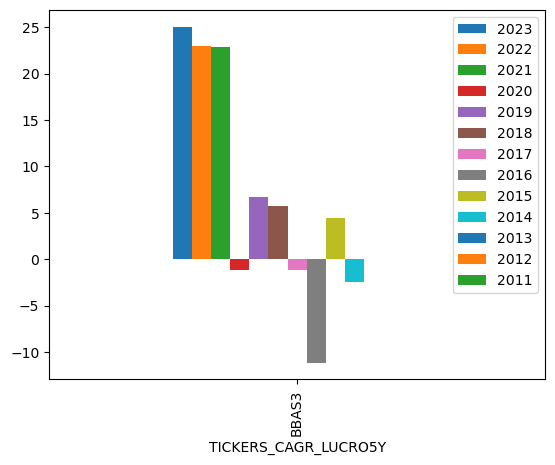

In [99]:
cagr_lucro5.plot(x="TICKERS_CAGR_LUCRO5Y",  kind="bar")

<Axes: xlabel='TICKERS_DIVIDEND'>

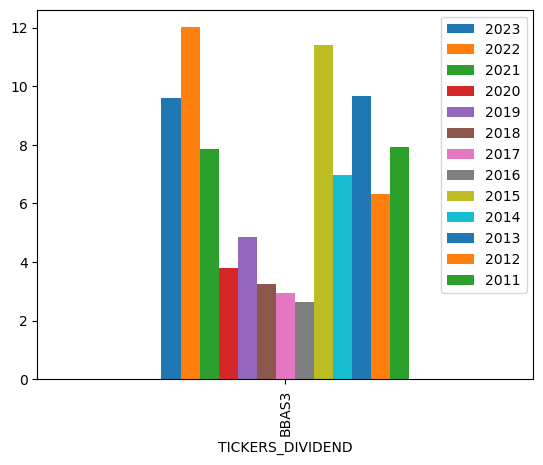

In [101]:
dividend.plot(x='TICKERS_DIVIDEND',  kind="bar")